In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

In [2]:
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_5_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_20_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0172022_run_60_days.zarr')
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_90_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days_no_buried.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_updated_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_updated_ratio_year_simulation.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_kernel_updated.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_updated_UV_fieldset.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_updated_UV_and_kernel.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_012.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_025_ratio_0_2_sv_5.zarr'
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_1_sv_5_AD_0_052.zarr'
data = xr.open_dataset(filename)
#
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
data

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset> Size: 404MB
Dimensions:       (trajectory: 2880, obs: 1460)
Coordinates:
  * obs           (obs) int32 6kB 0 1 2 3 4 5 ... 1454 1455 1456 1457 1458 1459
  * trajectory    (trajectory) int64 23kB 0 1 2 3 4 ... 2875 2876 2877 2878 2879
Data variables: (12/20)
    H_vel_2       (trajectory, obs) float32 17MB ...
    bat_particle  (trajectory, obs) float32 17MB ...
    crit          (trajectory, obs) float32 17MB ...
    e3t           (trajectory, obs) float32 17MB ...
    fact          (trajectory, obs) float32 17MB ...
    fmask         (trajectory, obs) float32 17MB ...
    ...            ...
    umask         (trajectory, obs) float32 17MB ...
    uvalue        (trajectory, obs) float32 17MB ...
    vmask         (trajectory, obs) float32 17MB ...
    vvalue        (trajectory, obs) float32 17MB ...
    wvalue        (trajectory, obs) float32 17MB ...
    z             (trajectory, obs) float64 34MB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        MPParticlePBDEs_statesSinkingAdvectionturb_mixres...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

PBDE Simulation (newest code by Susan) analysis :D

In [3]:
print (nobs, ntraj)

1460 2880


# REGIONAL ANALYSIS

In [4]:
import Regions_functions_V2
from Regions_functions_V2 import plot_vertical_concentration_state_profiles, plot_vertical_total_state_profiles, plot_vertical_state_status, interpolate_volume_profile

/tmp/ipykernel_383065/3669761077.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


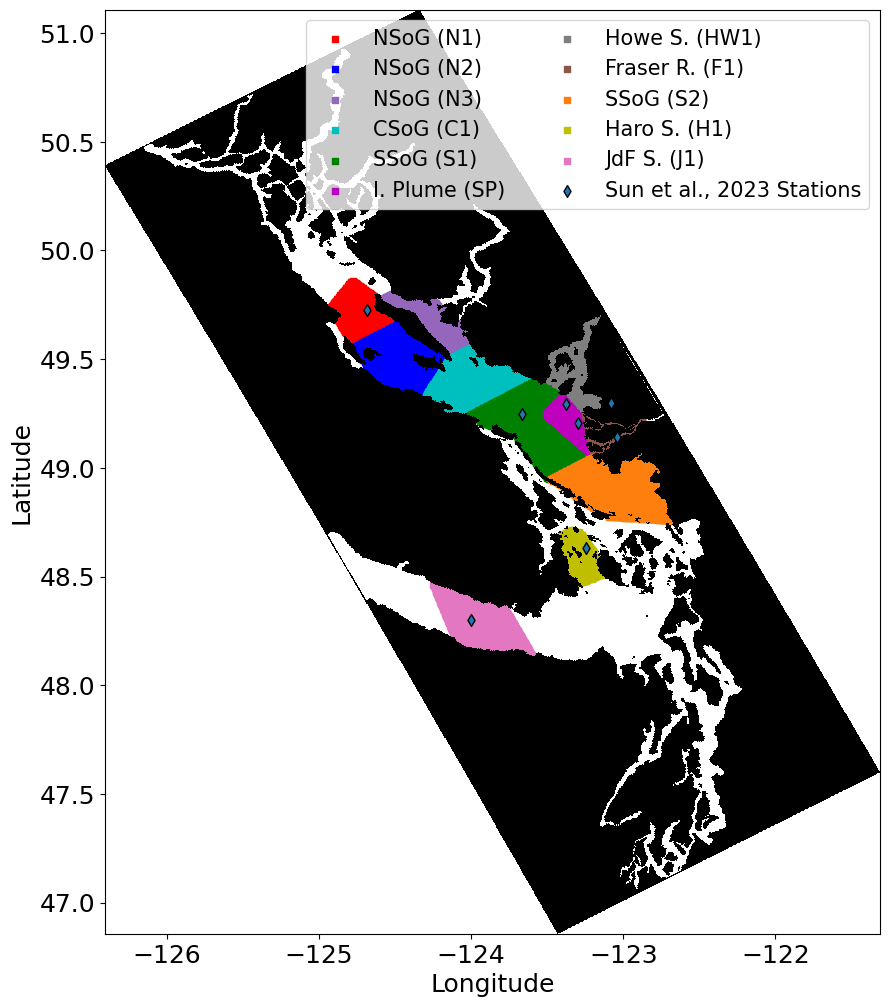

In [5]:
lon_NSoG_N1, lat_NSoG_N1 = Regions_functions_V2.lon_NSoG_N1, Regions_functions_V2.lat_NSoG_N1
lon_NSoG_N2, lat_NSoG_N2 = Regions_functions_V2.lon_NSoG_N2, Regions_functions_V2.lat_NSoG_N2
lon_NSoG_N3, lat_NSoG_N3 = Regions_functions_V2.lon_NSoG_N3, Regions_functions_V2.lat_NSoG_N3
lon_CSoG_C1, lat_CSoG_C1 = Regions_functions_V2.lon_CSoG_C1, Regions_functions_V2.lat_CSoG_C1
lon_SSoG_S1, lat_SSoG_S1 = Regions_functions_V2.lon_SSoG_S1, Regions_functions_V2.lat_SSoG_S1
lon_SSoG_SP, lat_SSoG_SP = Regions_functions_V2.lon_SSoG_SP, Regions_functions_V2.lat_SSoG_SP
lon_SSoG_S2, lat_SSoG_S2 = Regions_functions_V2.lon_SSoG_S2, Regions_functions_V2.lat_SSoG_S2
lon_Haro_H1, lat_Haro_H1 = Regions_functions_V2.lon_Haro_H1, Regions_functions_V2.lat_Haro_H1
lon_Juan_J1, lat_Juan_J1 = Regions_functions_V2.lon_Juan_J1, Regions_functions_V2.lat_Juan_J1
lon_Fraser_F1, lat_Fraser_F1 = Regions_functions_V2.lon_Fraser_F1, Regions_functions_V2.lat_Fraser_F1
lon_Howe_HW1, lat_Howe_HW1 = Regions_functions_V2.lon_Howe_HW1, Regions_functions_V2.lat_Howe_HW1
#########
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions = ['NSoG (N1)', 'NSoG (N2)',  'NSoG (N3)', 'CSoG (C1)', 'SSoG (S1)', 'I. Plume (SP)', 'Howe S. (HW1)', 'Fraser R. (F1)', 'SSoG (S2)', 'Haro S. (H1)', 'JdF S. (J1)']
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (10,12))
ax.scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
ax.scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[1],s = 20,  marker = 's', label=regions[1])
ax.scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[2],s = 20,  marker = 's', label=regions[2])
ax.scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[3],s = 20, marker = 's', label=regions[3])
ax.scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
ax.scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
ax.scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's', label=regions[6])
ax.scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[7], s = 20, marker = 's',label=regions[7])
ax.scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[8], s = 20 ,marker = 's', label=regions[8])
ax.scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[9],s = 20,marker = 's', label=regions[9])
ax.scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[10],s = 20,marker = 's', label=regions[10])
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
#
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#
stations = ['JF2', 'HS', 'S4-1.5', 'S2', 'NG', 'S1', 'S3', 'FR']
lat = np.array([48 + (18/60), 48 + (37.80/60) , 49 + (15/60) , 49 + (17.58/60) , 49 + (43.60/60), 49 + (12.32/60), 49 + (17.88/60), 49 + (08.66/60)])
lon = (-1) * np.array([124, 123 + (14.60/60), 123 + (40/60), 123 + (22.51/60), 124 + (40.80/60), 123 + (18/60), 123 + (04.91/60), 123 + (02.65/60)]) 
ax.scatter(lon, lat, marker = 'd', edgecolor = 'k', label = 'Sun et al., 2023 Stations')
#
ax.legend(loc = 'upper right', fontsize = 15, ncol = 2)

In [6]:
polygon_dict = Regions_functions_V2.polygon_definition(filename)

In [7]:
volumes_regions_depths = Regions_functions_V2.volume_by_depth_all_regions(polygon_dict)

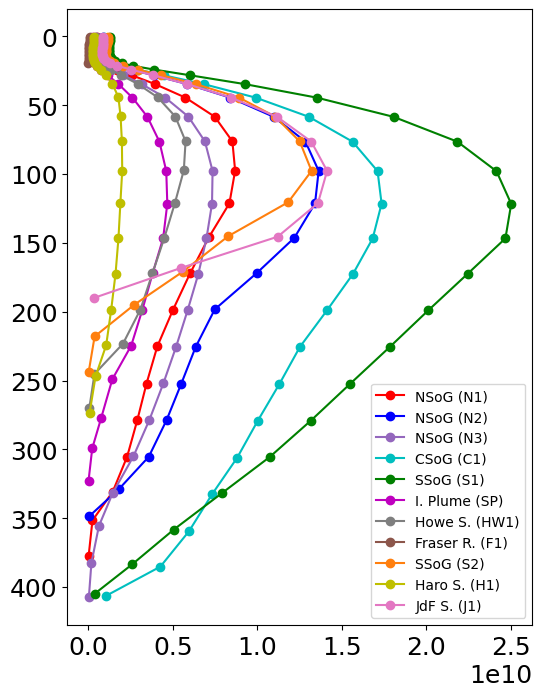

In [8]:
fig, ax = plt.subplots(figsize = (6,8))
ax.invert_yaxis()
ax.plot(volumes_regions_depths['N1'], volumes_regions_depths['N1'].depth, '-o', c = colors_regions[0], label = regions[0])
ax.plot(volumes_regions_depths['N2'], volumes_regions_depths['N2'].depth, '-o', c = colors_regions[1], label = regions[1])
ax.plot(volumes_regions_depths['N3'], volumes_regions_depths['N3'].depth, '-o', c = colors_regions[2], label = regions[2])
ax.plot(volumes_regions_depths['C1'], volumes_regions_depths['C1'].depth, '-o', c = colors_regions[3], label = regions[3])
ax.plot(volumes_regions_depths['S1'], volumes_regions_depths['S1'].depth, '-o', c = colors_regions[4], label = regions[4])
ax.plot(volumes_regions_depths['SP'], volumes_regions_depths['SP'].depth, '-o', c = colors_regions[5], label = regions[5])
ax.plot(volumes_regions_depths['HW1'], volumes_regions_depths['HW1'].depth, '-o', c = colors_regions[6], label = regions[6])
ax.plot(volumes_regions_depths['F1'], volumes_regions_depths['F1'].depth, '-o', c = colors_regions[7], label = regions[7])
ax.plot(volumes_regions_depths['S2'], volumes_regions_depths['S2'].depth, '-o', c = colors_regions[8], label = regions[8])
ax.plot(volumes_regions_depths['H1'], volumes_regions_depths['H1'].depth, '-o', c = colors_regions[9], label = regions[9])
ax.plot(volumes_regions_depths['J1'], volumes_regions_depths['J1'].depth, '-o', c = colors_regions[10], label = regions[10])
ax.legend(fontsize = 10)


Status sedimented and watercolumn exlusively per region

In [9]:
regions_water, regions_sedimented = Regions_functions_V2.status_states_regions_map(polygon_dict)
####### regions ########
# written like N1_sedimented_lon, N1_sedimented_lat 
#
region_names = ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']

water_regions_lon = [regions_water[region]['lon'] for region in region_names]
water_regions_lat = [regions_water[region]['lat'] for region in region_names]
water_regions_depth = [regions_water[region]['depth'] for region in region_names]

sedimented_regions_lon = [regions_sedimented[region]['lon'] for region in region_names]
sedimented_regions_lat = [regions_sedimented[region]['lat'] for region in region_names]
sedimented_regions_depth = [regions_sedimented[region]['depth'] for region in region_names]


In [10]:
#def interpolate_volume_profile(volume_profile, number_of_depths):
#    #
#    e3t = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/06aug15/SalishSea_1h_20150806_20150806_grid_T.nc')
#    deptht = e3t['deptht'].values  
#    original_z = volume_profile['depth'].values
#    #
#    new_z = np.linspace(original_z.min(), original_z.max(), number_of_depths)
#    #
#    interpolated_volume = volume_profile.interp(z=new_z)
#    #
#    new_depths = np.linspace(deptht.min(), deptht.max(), number_of_depths)
#    #
#    return interpolated_volume, new_depths
#
def interpolate_volume_profile(volume_profile, number_of_depths):
    # Get the existing depth coordinate values (z-levels mapped to actual depth)
    depth_vals = volume_profile['depth'].values
    volume_vals = volume_profile.values

    # Filter out NaNs
    valid = ~np.isnan(depth_vals) & ~np.isnan(volume_vals)
    depth_vals = depth_vals[valid]
    volume_vals = volume_vals[valid]

    # Define new depth bins (higher resolution)
    new_depths = np.linspace(depth_vals.min(), depth_vals.max(), number_of_depths)

    # Interpolate depths
    interp_volume_vals = np.interp(new_depths, depth_vals, volume_vals)
    #
    interpolated_volume = xr.DataArray(
        interp_volume_vals,
        coords={'depth': new_depths},
        dims='depth',
        name='volume'
    )

    return interpolated_volume, new_depths



In [11]:
depth_bins_regions = 81
#####
volume_N1, depths_N1 = interpolate_volume_profile(volumes_regions_depths['N1'], depth_bins_regions)
volume_N2, depths_N2 = interpolate_volume_profile(volumes_regions_depths['N2'], depth_bins_regions)
volume_N3, depths_N3 = interpolate_volume_profile(volumes_regions_depths['N3'], depth_bins_regions)
volume_C1, depths_C1 = interpolate_volume_profile(volumes_regions_depths['C1'], depth_bins_regions)
volume_S1, depths_S1 = interpolate_volume_profile(volumes_regions_depths['S1'], depth_bins_regions)
volume_SP, depths_SP = interpolate_volume_profile(volumes_regions_depths['SP'], depth_bins_regions)
volume_HW1, depths_HW1 = interpolate_volume_profile(volumes_regions_depths['HW1'], depth_bins_regions)
volume_F1, depths_F1 = interpolate_volume_profile(volumes_regions_depths['F1'], depth_bins_regions)
volume_S2, depths_S2 = interpolate_volume_profile(volumes_regions_depths['S2'], depth_bins_regions)
volume_H1, depths_H1 = interpolate_volume_profile(volumes_regions_depths['H1'], depth_bins_regions)
volume_J1, depths_J1 = interpolate_volume_profile(volumes_regions_depths['J1'], depth_bins_regions)


In [12]:
vertical_N1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['N1'], depth_bin_edges=depths_N1)
vertical_N2_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['N2'], depth_bin_edges=depths_N2)
vertical_N3_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['N3'], depth_bin_edges=depths_N3)
vertical_C1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['C1'], depth_bin_edges=depths_C1)
vertical_S1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['S1'], depth_bin_edges=depths_S1)
vertical_SP_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['SP'], depth_bin_edges=depths_SP)
vertical_HW1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['HW1'], depth_bin_edges=depths_HW1)
vertical_F1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['F1'], depth_bin_edges=depths_F1)
vertical_S2_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['S2'], depth_bin_edges=depths_S2)
vertical_H1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['H1'], depth_bin_edges=depths_H1)
vertical_J1_total = Regions_functions_V2.binned_particle_counts_by_depth(polygon_dict['J1'], depth_bin_edges=depths_J1)
#
status_vertical_N1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N1'], depth_bin_edges=depths_N1)
status_vertical_N2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N2'], depth_bin_edges=depths_N2)
status_vertical_N3 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N3'], depth_bin_edges=depths_N3)
status_vertical_C1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['C1'], depth_bin_edges=depths_C1)
status_vertical_S1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S1'], depth_bin_edges=depths_S1)
status_vertical_SP = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['SP'], depth_bin_edges=depths_SP)
status_vertical_HW1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['HW1'], depth_bin_edges=depths_HW1)
status_vertical_F1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['F1'], depth_bin_edges=depths_F1)
status_vertical_S2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S2'], depth_bin_edges=depths_S2)
status_vertical_H1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['H1'], depth_bin_edges=depths_H1)
status_vertical_J1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['J1'], depth_bin_edges=depths_J1)

In [13]:
perfiles_vertical_total = [vertical_N1_total, vertical_N2_total, vertical_N3_total, vertical_C1_total, vertical_S1_total, vertical_SP_total
                          , vertical_HW1_total, vertical_F1_total, vertical_S2_total, vertical_H1_total, vertical_J1_total]
###################### Status #########################
status_profiles = [status_vertical_N1, status_vertical_N2, status_vertical_N3, status_vertical_C1
                   , status_vertical_S1, status_vertical_SP, status_vertical_HW1, status_vertical_F1, 
                   status_vertical_S2, status_vertical_H1, status_vertical_J1]
##################### Volumes ##########################
volumes_array = [volume_N1.values[:-1], volume_N2.values[:-1], volume_N3.values[:-1], volume_C1.values[:-1], volume_S1.values[:-1], volume_SP.values[:-1],
                  volume_HW1.values[:-1], volume_F1.values[:-1], volume_S2.values[:-1], volume_H1.values[:-1], volume_J1.values[:-1]]

# Regions Profiles

Smothing

In [14]:
from scipy.interpolate import UnivariateSpline

def smooth_profile(df, method='spline', smoothing_factor=100, window=5):
    """
    Smooths a vertical profile from a pandas DataFrame with columns 'Avg. Depth' and 'Particle Count'.
    
    Parameters:
    - df: pandas DataFrame with 'Avg. Depth' and 'Particle Count'
    - method: 'spline' or 'moving_average'
    - smoothing_factor: for spline (UnivariateSpline s parameter)
    - window: for moving average (number of points)

    Returns:
    - DataFrame with original depths and smoothed counts
    """
    depth = df['Avg. Depth'].values
    count = df['Particle Count'].values

    if method == 'spline':
        # Sort by depth just in case
        sort_idx = np.argsort(depth)
        depth_sorted = depth[sort_idx]
        count_sorted = count[sort_idx]

        # Fit spline
        spline = UnivariateSpline(depth_sorted, count_sorted, s=smoothing_factor)

        # Evaluate spline at original (unsorted) depths
        smoothed_count = spline(depth)

    elif method == 'moving_average':
        smoothed_count = pd.Series(count).rolling(window=window, center=True, min_periods=1).mean().values

    else:
        raise ValueError("Method must be either 'spline' or 'moving_average'")

    # Return new DataFrame
    return pd.DataFrame({
        'Avg. Depth': depth,
        'Smoothed Count': smoothed_count
    })


In [15]:
smoothed_N1 = smooth_profile(vertical_N1_total, smoothing_factor = 1000)
smoothed_N2 = smooth_profile(vertical_N2_total, smoothing_factor = 1000)
smoothed_N3 = smooth_profile(vertical_N3_total, smoothing_factor = 1000)
smoothed_C1 = smooth_profile(vertical_C1_total, smoothing_factor = 1000)
smoothed_S1 = smooth_profile(vertical_S1_total, smoothing_factor = 1000)
smoothed_SP = smooth_profile(vertical_SP_total, smoothing_factor = 1000)
smoothed_HW1 = smooth_profile(vertical_HW1_total, smoothing_factor = 1000)
smoothed_F1 = smooth_profile(vertical_F1_total, smoothing_factor = 1000)
smoothed_S2 = smooth_profile(vertical_S2_total, smoothing_factor = 1000)
smoothed_H1 = smooth_profile(vertical_H1_total, smoothing_factor = 1000)
smoothed_J1 = smooth_profile(vertical_J1_total, smoothing_factor = 1000)

Testing function for volume by depth 

In [16]:
status_label = ['Particles Status 1', 'Particles Status 2', 'Particles Status 3', 'Particles Status 11', 'Particles Status 12', 'Particles Status 13', 'Particles Status 21', 'Particles Status 22', 'Particles Status 23']
states = ['Sewage Water', 'Colloidal Water', 'Marine Water', 'Sewage Sedimented', 'Colloidal Sedimented', 'Marine Sedimented', 'Sewage Buried', 'Colloidal Buried', 'Marine Buried']
#colors = ['r', 'b', 'c', 'g', 'tab:orange', 'y', 'm', 'tab:brown', 'tab:gray']
#regions = ['N1', 'N2', 'C1', 'S1','HW1', 'F1', 'S2', 'H1', 'J1']

/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:783: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:783: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:783: UserWarning: The input coordinates to pcolormesh are 

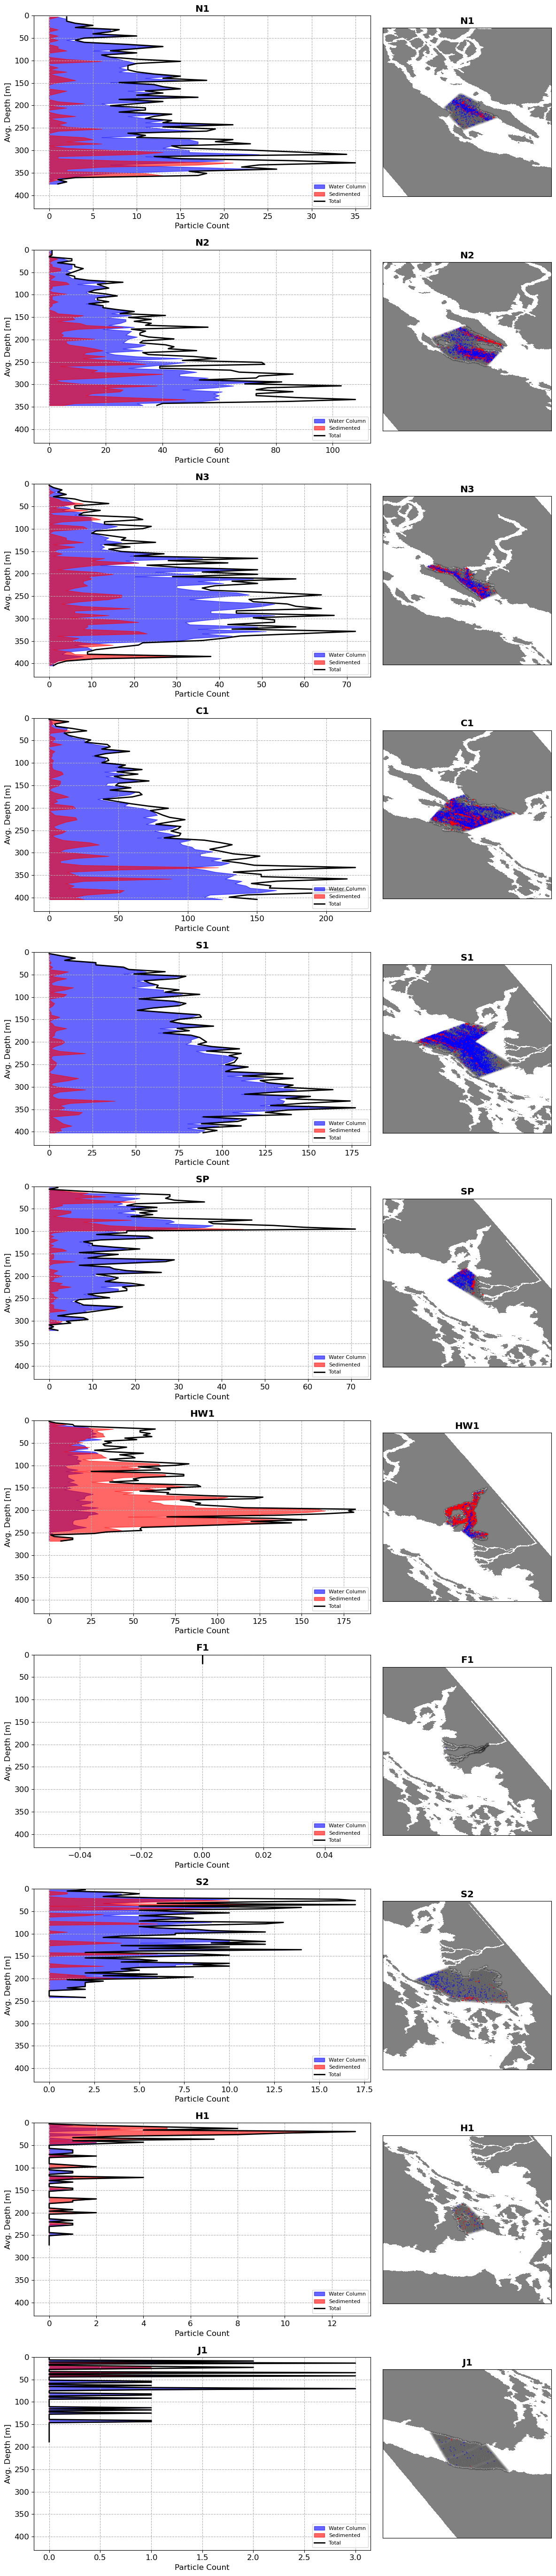

/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:874: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:874: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:874: UserWarning: The input coordinates to pcolormesh are 

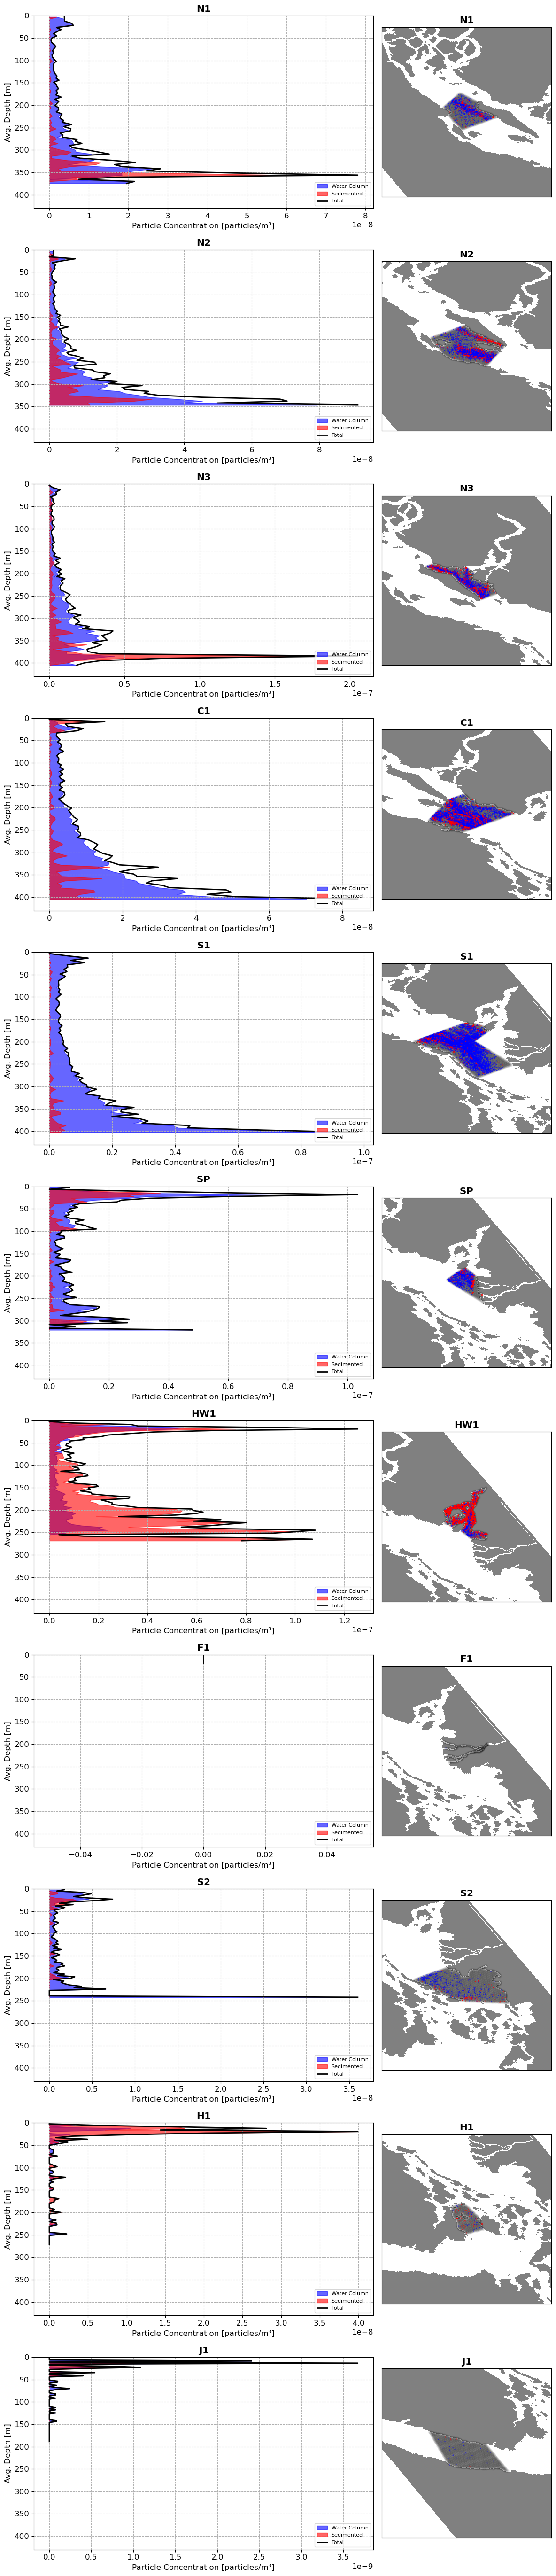

In [17]:
plot_vertical_total_state_profiles(perfiles_vertical_total, status_profiles,
                                   water_regions_lon, water_regions_lat,
                                   sedimented_regions_lon, sedimented_regions_lat, 
                                   water_regions_depth, sedimented_regions_depth)
#
plot_vertical_concentration_state_profiles(perfiles_vertical_total, status_profiles,
                                   water_regions_lon, water_regions_lat,
                                   sedimented_regions_lon, sedimented_regions_lat, volumes_array)

Vertical plots of every END OF THE MONTH particles showing the amount in the water column and in the sediment

What about the amount of particles per region vs time (sediment and water)?

In [18]:
def water_sediment_count(polygon, data, t):
    #
    _, _, _, status_inside, _ = Regions_functions_V2.points_inside(polygon, data, t)
    #
    water_status = [1, 2, 3]
    sediment_status = [11, 12, 13]
    #
    water_count = np.isin(status_inside, water_status).sum()
    sediment_count = np.isin(status_inside, sediment_status).sum()
    #
    return water_count, sediment_count


In [19]:
step = 10  
time_indices = np.arange(0, len(data.obs), step)
#
region_names = ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']
water_dict = {}
sediment_dict = {}

for region in region_names:
    water_arr = np.zeros(len(time_indices))
    sediment_arr = np.zeros(len(time_indices))
    polygon = polygon_dict[region][0]
    
    for idx, t in enumerate(time_indices):
        water_arr[idx], sediment_arr[idx] = water_sediment_count(polygon, data, t)
    
    water_dict[region] = water_arr
    sediment_dict[region] = sediment_arr



In [20]:
def spreading_over_time_by_status(
    filename, source_lon, source_lat,
    tt_step=100, utm_epsg='EPSG:32610'
):
    from geopy.distance import geodesic
    from scipy.spatial import ConvexHull
    from pyproj import Transformer

    # Load dataset and variables
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    status = data.status.values
    depth = data.z.values 
    time = data.time[0, :].values

    results_water = []
    results_sediment = []

    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)
    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        for label, results_list, valid_status in [
            ("water", results_water, [1, 2, 3]),
            ("sediment", results_sediment, [11, 12, 13])
        ]:
            lon_t = lons[:, tt]
            lat_t = lats[:, tt]
            status_t = status[:, tt]
            depth_t = depth[:, tt]

            valid = (
                ~np.isnan(lon_t) &
                ~np.isnan(lat_t) &
                ~np.isnan(depth_t) &
                np.isin(status_t, valid_status)
            )
            if np.count_nonzero(valid) < 3:
                continue

            lon_t = lon_t[valid]
            lat_t = lat_t[valid]
            depth_t = depth_t[valid]

            # Distance from source (in km)
            distances_km = np.array([
                geodesic((source_lat, source_lon), (lat, lon)).km
                for lat, lon in zip(lat_t, lon_t)
            ])
            mean_dist = np.mean(distances_km)
            std_dist = np.std(distances_km)

            # UTM projection (in km)
            x_m, y_m = transformer.transform(lon_t, lat_t)
            x_km = np.array(x_m) / 1000
            y_km = np.array(y_m) / 1000

            var_x = np.var(x_km)
            var_y = np.var(y_km)

            # Convex hull
            coords = np.stack([x_km, y_km], axis=1)
            try:
                hull = ConvexHull(coords)
                hull_area = hull.volume
            except Exception:
                hull_area = np.nan

            mean_depth = np.mean(depth_t)

            results_list.append({
                'time': time[tt],
                'mean_distance_km': mean_dist,
                'std_distance_km': std_dist,
                'var_x_km2': var_x,
                'var_y_km2': var_y,
                'convex_hull_area_km2': hull_area,
                'mean_depth_m': mean_depth
            })

    df_water = pd.DataFrame(results_water).set_index('time')
    df_sediment = pd.DataFrame(results_sediment).set_index('time')
    return df_water, df_sediment


In [21]:
lat_source = 49.195045
lon_source = -123.301956
spread_water, spread_sediment = spreading_over_time_by_status(filename=filename,
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [22]:
spread_water.head()

mean_distance_km  std_distance_km  var_x_km2  var_y_km2  \
time                                                                           
2022-01-01 06:30:00          0.466564         0.447564   0.000190   0.201099   
2022-01-01 12:30:00          0.866069         0.544097   0.006374   0.297460   
2022-01-01 18:30:00          0.610942         0.436683   0.043763   0.271605   
2022-01-02 00:30:00          2.035973         1.258040   0.288041   1.579081   
2022-01-02 06:30:00          1.723839         1.912897   0.210210   5.338670   

                     convex_hull_area_km2  mean_depth_m  
time                                                     
2022-01-01 06:30:00              0.036958     64.410395  
2022-01-01 12:30:00              0.360776     75.005100  
2022-01-01 18:30:00              1.182738     82.090208  
2022-01-02 00:30:00              5.589816     88.768658  
2022-01-02 06:30:00             12.854964     69.923396

In [23]:
volumes_regions, _ = Regions_functions_V2.volumes()

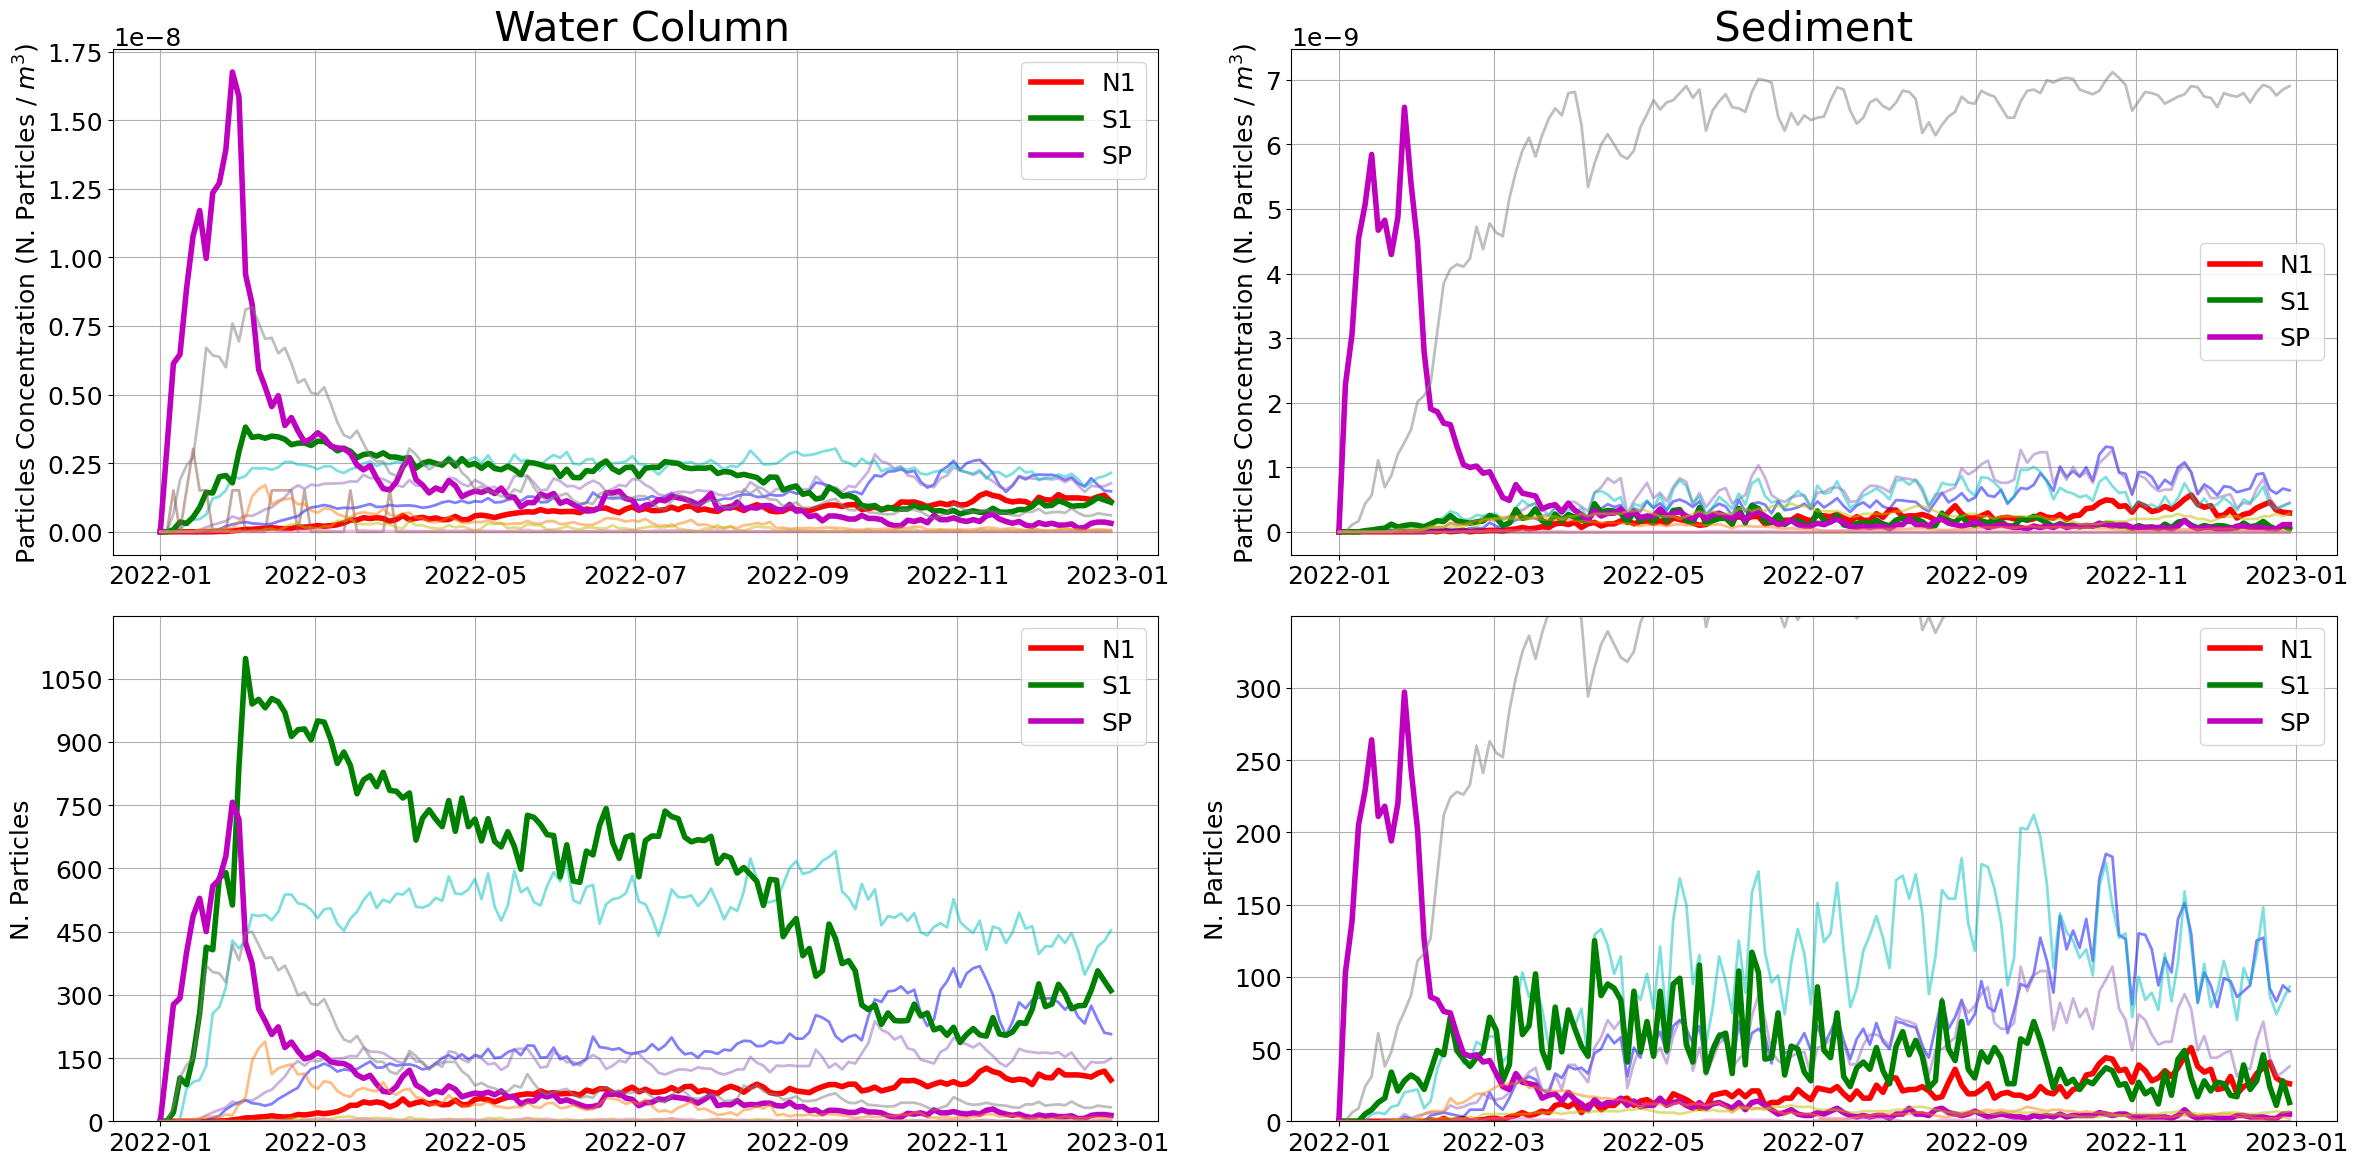

In [24]:
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2,2,figsize = (24,12))
ax[0,0].plot(data.time[0,time_indices], water_dict['N1'] / volumes_regions[0], colors_regions[0], linewidth = 4, label = region_names[0])
ax[0,0].plot(data.time[0,time_indices], water_dict['N2'] / volumes_regions[1], colors_regions[1], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['N3'] / volumes_regions[2], colors_regions[2], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['C1'] / volumes_regions[3], colors_regions[3], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['S1'] / volumes_regions[4], colors_regions[4], linewidth = 4,label = region_names[4])
ax[0,0].plot(data.time[0,time_indices], water_dict['SP'] / volumes_regions[5], colors_regions[5], linewidth = 4,label = region_names[5])
ax[0,0].plot(data.time[0,time_indices], water_dict['HW1'] / volumes_regions[6], colors_regions[6], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['F1'] / volumes_regions[7], colors_regions[7], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['S2'] / volumes_regions[8], colors_regions[8], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['H1'] / volumes_regions[9], colors_regions[9], linewidth = 2, alpha = .5)
ax[0,0].plot(data.time[0,time_indices], water_dict['J1'] / volumes_regions[10], colors_regions[10], linewidth = 2, alpha = .5)
#
ax[0,1].plot(data.time[0,time_indices], sediment_dict['N1'] / volumes_regions[0], colors_regions[0], linewidth = 4, label = region_names[0])
ax[0,1].plot(data.time[0,time_indices], sediment_dict['N2'] / volumes_regions[1], colors_regions[1], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['N3'] / volumes_regions[2], colors_regions[2], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['C1'] / volumes_regions[3], colors_regions[3], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['S1'] / volumes_regions[4], colors_regions[4], linewidth = 4, label = region_names[4])
ax[0,1].plot(data.time[0,time_indices], sediment_dict['SP'] / volumes_regions[5], colors_regions[5], linewidth = 4, label = region_names[5])
ax[0,1].plot(data.time[0,time_indices], sediment_dict['HW1'] / volumes_regions[6], colors_regions[6], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['F1'] / volumes_regions[7], colors_regions[7], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['S2'] / volumes_regions[8], colors_regions[8], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['H1'] / volumes_regions[9], colors_regions[9], linewidth = 2, alpha = .5)
ax[0,1].plot(data.time[0,time_indices], sediment_dict['J1'] / volumes_regions[10], colors_regions[10], linewidth = 2, alpha = .5)
#
#ax[0,0].set_ylim([0,1500])
#ax[0,0].set_yticks(np.arange(0,1500, 150))
#ax[0,1].set_ylim([0,500])
#ax[0,1].set_yticks(np.arange(0,500, 50))
#
ax[0,0].set_title(' Water Column' , fontsize = 30)
ax[0,1].set_title(' Sediment ', fontsize = 30)
#
ax[0,0].grid()
ax[0,1].grid()
#
ax[0,0].legend()
ax[0,1].legend()
#
ax[0,0].set_ylabel(r'Particles Concentration (N. Particles / $m^3$)')
ax[0,1].set_ylabel(r'Particles Concentration (N. Particles / $m^3$)')
#
#####
ax[1,0].plot(data.time[0,time_indices], water_dict['N1'] , colors_regions[0], linewidth = 4, label = region_names[0])
ax[1,0].plot(data.time[0,time_indices], water_dict['N2'], colors_regions[1], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['N3'], colors_regions[2], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['C1'], colors_regions[3], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['S1'], colors_regions[4], linewidth = 4,label = region_names[4])
ax[1,0].plot(data.time[0,time_indices], water_dict['SP'], colors_regions[5], linewidth = 4,label = region_names[5])
ax[1,0].plot(data.time[0,time_indices], water_dict['HW1'], colors_regions[6], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['F1'], colors_regions[7], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['S2'], colors_regions[8], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['H1'], colors_regions[9], linewidth = 2, alpha = .5)
ax[1,0].plot(data.time[0,time_indices], water_dict['J1'], colors_regions[10], linewidth = 2, alpha = .5)
#
ax[1,1].plot(data.time[0,time_indices], sediment_dict['N1'], colors_regions[0], linewidth = 4, label = region_names[0])
ax[1,1].plot(data.time[0,time_indices], sediment_dict['N2'], colors_regions[1], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['N3'], colors_regions[2], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['C1'], colors_regions[3], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['S1'], colors_regions[4], linewidth = 4, label = region_names[4])
ax[1,1].plot(data.time[0,time_indices], sediment_dict['SP'], colors_regions[5], linewidth = 4, label = region_names[5])
ax[1,1].plot(data.time[0,time_indices], sediment_dict['HW1'], colors_regions[6], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['F1'], colors_regions[7], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['S2'], colors_regions[8], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['H1'], colors_regions[9], linewidth = 2, alpha = .5)
ax[1,1].plot(data.time[0,time_indices], sediment_dict['J1'], colors_regions[10], linewidth = 2, alpha = .5)
#
ax[1,0].set_ylim([0,1200])
ax[1,0].set_yticks(np.arange(0,1200, 150))
ax[1,1].set_ylim([0,350])
ax[1,1].set_yticks(np.arange(0,350, 50))
#
ax[1,0].grid()
ax[1,1].grid()
#
ax[1,0].legend()
ax[1,1].legend()
#
ax[1,0].set_ylabel('N. Particles')
ax[1,1].set_ylabel('N. Particles')
#
plt.tight_layout()

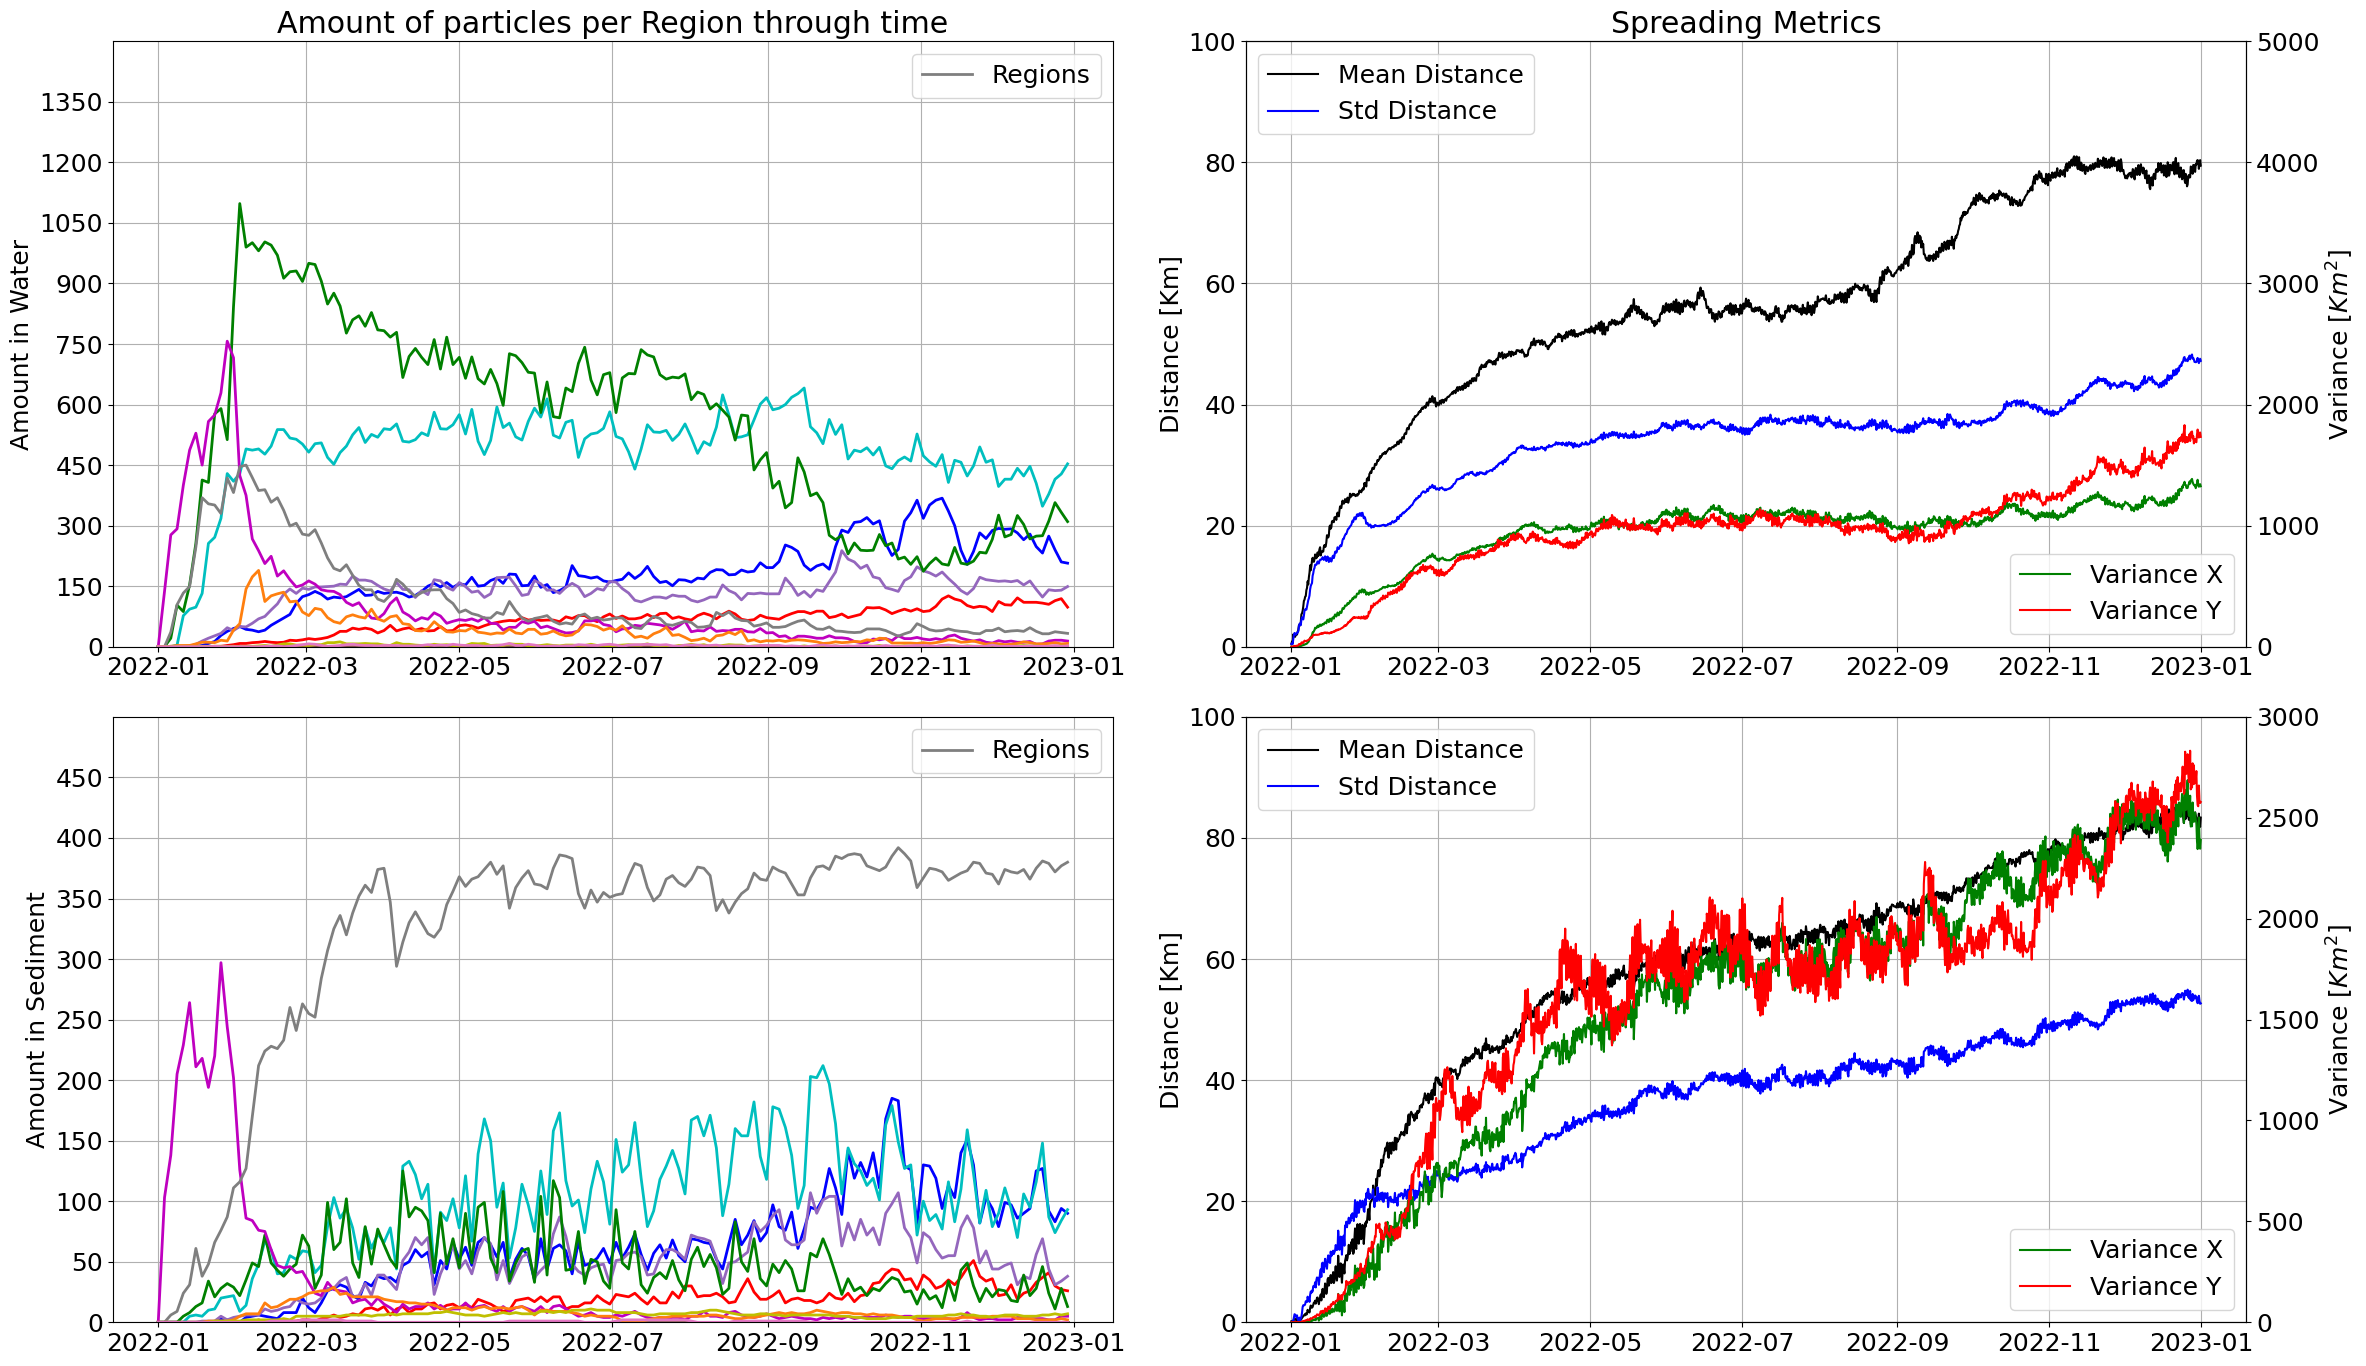

In [25]:
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2,2,figsize = (24,14))
ax[0,0].plot(data.time[0,time_indices], water_dict['N1'], colors_regions[0], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['N2'], colors_regions[1], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['N3'], colors_regions[2], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['C1'], colors_regions[3], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['S1'], colors_regions[4], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['SP'], colors_regions[5], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['HW1'], colors_regions[6], linewidth = 2, label = 'Regions')
ax[0,0].plot(data.time[0,time_indices], water_dict['F1'], colors_regions[7], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['S2'], colors_regions[8], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['H1'], colors_regions[9], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['J1'], colors_regions[10], linewidth = 2)
#
ax[1,0].plot(data.time[0,time_indices], sediment_dict['N1'], colors_regions[0], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['N2'], colors_regions[1], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['N3'], colors_regions[2], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['C1'], colors_regions[3], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['S1'], colors_regions[4], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['SP'], colors_regions[5], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['HW1'], colors_regions[6], linewidth = 2, label = 'Regions')
ax[1,0].plot(data.time[0,time_indices], sediment_dict['F1'], colors_regions[7], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['S2'], colors_regions[8], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['H1'], colors_regions[9], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['J1'], colors_regions[10], linewidth = 2)
#
ax[0,0].set_ylim([0,1500])
ax[0,0].set_yticks(np.arange(0,1500, 150))
ax[1,0].set_ylim([0,500])
ax[1,0].set_yticks(np.arange(0,500, 50))
#
ax[0,0].grid()
ax[0,0].legend()
ax[1,0].grid()
ax[1,0].legend()
#
ax[0,0].set_ylabel('Amount in Water')
ax[1,0].set_ylabel('Amount in Sediment')
#
ax[0,0].set_title('Amount of particles per Region through time')
#
ax[0,1].plot(spread_water['mean_distance_km'],'-k', label = 'Mean Distance')
ax[0,1].plot(spread_water['std_distance_km'],'-b', label = 'Std Distance')
ax[0,1].set_ylabel('Distance [Km]')
ax[0,1].set_title('Spreading Metrics')
ax[0,1].set_ylim([0,100])
ax[0,1].legend(loc = 'upper left')
ax[0,1].grid()
axis1 = ax[0,1].twinx()
axis1.plot(spread_water['var_x_km2'],'-g', label = 'Variance X')
axis1.plot(spread_water['var_y_km2'],'-r', label = 'Variance Y')
axis1.set_ylabel('Variance [$Km^{2}$]')
axis1.set_ylim([0,5000])
axis1.legend(loc = 'lower right')

#
ax[1,1].plot(spread_sediment['mean_distance_km'],'-k', label = 'Mean Distance')
ax[1,1].plot(spread_sediment['std_distance_km'],'-b', label = 'Std Distance')
ax[1,1].set_ylabel('Distance [Km]')
ax[1,1].set_ylim([0,100])
ax[1,1].grid()
ax[1,1].legend(loc = 'upper left')

axis2 = ax[1,1].twinx()
axis2.plot(spread_sediment['var_x_km2'],'-g', label = 'Variance X')
axis2.plot(spread_sediment['var_y_km2'],'-r', label = 'Variance Y')
axis2.set_ylabel('Variance [$Km^{2}$]')
axis2.set_ylim([0,3000])
axis2.legend(loc = 'lower right')

plt.tight_layout()

In [26]:
total_regions_water = water_dict['N1'].sum() + water_dict['N2'].sum() + water_dict['N3'].sum() + water_dict['C1'].sum()  + water_dict['S1'].sum() + water_dict['SP'].sum() + water_dict['HW1'].sum() + water_dict['F1'].sum()  + water_dict['S2'].sum() + water_dict['H1'].sum() + water_dict['J1'].sum()


In [27]:
(water_dict['H1'].sum() / total_regions_water) * 100

0.17265092324349632

Bar plots by region

In [28]:
regions = ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']

Water column

In [29]:
bar_regions_sewage_water = [status_vertical_N1['Particles Status 1'].sum(), status_vertical_N2['Particles Status 1'].sum()
                            , status_vertical_N3['Particles Status 1'].sum(), status_vertical_C1['Particles Status 1'].sum()
                            , status_vertical_S1['Particles Status 1'].sum(), status_vertical_SP['Particles Status 1'].sum()
                            , status_vertical_HW1['Particles Status 1'].sum(), status_vertical_F1['Particles Status 1'].sum()
                            , status_vertical_S2['Particles Status 1'].sum(), status_vertical_H1['Particles Status 1'].sum()
                            , status_vertical_J1['Particles Status 1'].sum()]
#
bar_regions_colloidal_water = [status_vertical_N1['Particles Status 2'].sum(), status_vertical_N2['Particles Status 2'].sum()
                            , status_vertical_N3['Particles Status 2'].sum(), status_vertical_C1['Particles Status 2'].sum()
                            , status_vertical_S1['Particles Status 2'].sum(), status_vertical_SP['Particles Status 2'].sum()
                            , status_vertical_HW1['Particles Status 2'].sum(), status_vertical_F1['Particles Status 2'].sum()
                            , status_vertical_S2['Particles Status 2'].sum(), status_vertical_H1['Particles Status 2'].sum()
                            , status_vertical_J1['Particles Status 2'].sum()]
#
bar_regions_marine_water = [status_vertical_N1['Particles Status 3'].sum(), status_vertical_N2['Particles Status 3'].sum()
                            , status_vertical_N3['Particles Status 3'].sum(), status_vertical_C1['Particles Status 3'].sum()
                            , status_vertical_S1['Particles Status 3'].sum(), status_vertical_SP['Particles Status 3'].sum()
                            , status_vertical_HW1['Particles Status 3'].sum(), status_vertical_F1['Particles Status 3'].sum()
                            , status_vertical_S2['Particles Status 3'].sum(), status_vertical_H1['Particles Status 3'].sum()
                            , status_vertical_J1['Particles Status 3'].sum()]

Sediment

In [30]:
bar_regions_sewage_sediment = [status_vertical_N1['Particles Status 11'].sum(), status_vertical_N2['Particles Status 11'].sum()
                            , status_vertical_N3['Particles Status 11'].sum(), status_vertical_C1['Particles Status 11'].sum()
                            , status_vertical_S1['Particles Status 11'].sum(), status_vertical_SP['Particles Status 11'].sum()
                            , status_vertical_HW1['Particles Status 11'].sum(), status_vertical_F1['Particles Status 11'].sum()
                            , status_vertical_S2['Particles Status 11'].sum(), status_vertical_H1['Particles Status 11'].sum()
                            , status_vertical_J1['Particles Status 11'].sum()]
#
bar_regions_colloidal_sediment = [status_vertical_N1['Particles Status 12'].sum(), status_vertical_N2['Particles Status 12'].sum()
                            , status_vertical_N3['Particles Status 12'].sum(), status_vertical_C1['Particles Status 12'].sum()
                            , status_vertical_S1['Particles Status 12'].sum(), status_vertical_SP['Particles Status 12'].sum()
                            , status_vertical_HW1['Particles Status 12'].sum(), status_vertical_F1['Particles Status 12'].sum()
                            , status_vertical_S2['Particles Status 12'].sum(), status_vertical_H1['Particles Status 12'].sum()
                            , status_vertical_J1['Particles Status 12'].sum()]
#
bar_regions_marine_sediment = [status_vertical_N1['Particles Status 13'].sum(), status_vertical_N2['Particles Status 13'].sum()
                            , status_vertical_N3['Particles Status 13'].sum(), status_vertical_C1['Particles Status 13'].sum()
                            , status_vertical_S1['Particles Status 13'].sum(), status_vertical_SP['Particles Status 13'].sum()
                            , status_vertical_HW1['Particles Status 13'].sum(), status_vertical_F1['Particles Status 13'].sum()
                            , status_vertical_S2['Particles Status 13'].sum(), status_vertical_H1['Particles Status 13'].sum()
                            , status_vertical_J1['Particles Status 13'].sum()]

In [31]:
bar_regions_water = np.array(bar_regions_sewage_water) + np.array(bar_regions_colloidal_water) + np.array(bar_regions_marine_water)
bar_regions_sediment = np.array(bar_regions_sewage_sediment) + np.array(bar_regions_colloidal_sediment) + np.array(bar_regions_marine_sediment)

In [32]:
bar_regions_colloidal_water[0] / bar_regions_colloidal_water[4]

0.11531161024992091

In [33]:
print(bar_regions_water)
print(bar_regions_sediment)

[ 794 2235 1717 5819 6839 1099 1310    0  399   27   25]
[ 186  791  573 1095  430  285 4005    0   98   70    6]


In [34]:
mean_depths_region_water = np.zeros(len(water_regions_depth)) 
mean_depths_region_sediment = np.zeros(len(sedimented_regions_depth)) 
#
for i in range(len(water_regions_depth)):
    mean_depths_region_water[i] = water_regions_depth[i].mean()
    mean_depths_region_sediment[i] = sedimented_regions_depth[i].mean()

/tmp/ipykernel_383065/2599613670.py:6: RuntimeWarning: Mean of empty slice.
  mean_depths_region_sediment[i] = sedimented_regions_depth[i].mean()
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [35]:
mean_depths_region_water

array([209.52156648, 232.63743852, 240.07901253, 273.05142075,
       243.04603802, 135.98400934, 124.63417448,   0.        ,
       101.98813924,  65.03408822,  51.57539967])

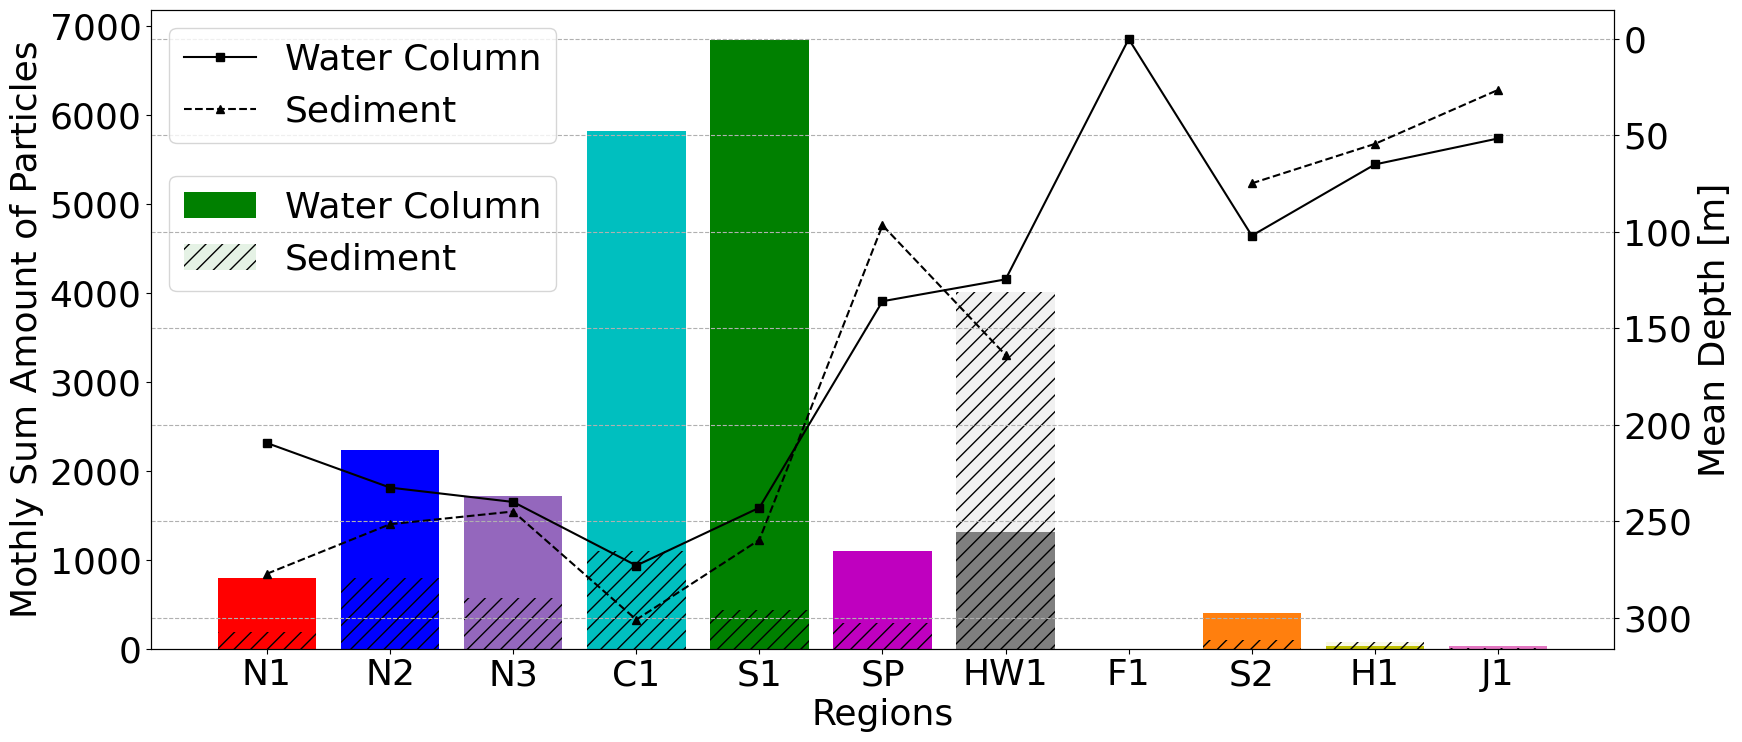

In [36]:
plt.rcParams.update({'font.size': 26})
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions_labels =  ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']
fig, axis = plt.subplots(figsize = (18,8))
#

ax = axis.twinx()
# Water column
axis.bar(regions_labels, bar_regions_water, color = colors_regions) 
axis.bar(regions_labels, bar_regions_sediment, color = colors_regions, hatch='//', alpha = .1) 
#
axis.bar(regions_labels[4], bar_regions_water[4], color = colors_regions[4], label = 'Water Column') 
axis.bar(regions_labels[4], bar_regions_sediment[4], color = colors_regions[4], hatch='//', alpha = .1, label = 'Sediment') 
#
axis.set_ylabel('Mothly Sum Amount of Particles')

#axis.grid()
axis.legend(loc = 'center left', bbox_to_anchor=(0, .65))
axis.set_xlabel('Regions') 
ax.plot(regions_labels,mean_depths_region_water, 's-k', label ='Water Column')   
ax.plot(regions_labels,mean_depths_region_sediment, '^--k', label = 'Sediment') 
ax.invert_yaxis() 
#
ax.legend(loc = 'upper left')
ax.grid(linestyle = '--')
ax.set_ylabel('Mean Depth [m]')
#ax.set_title('End of the month Particles')



plt.tight_layout()

Volumes and concentrations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'N1'),
  Text(1, 0, 'N2'),
  Text(2, 0, 'N3'),
  Text(3, 0, 'C1'),
  Text(4, 0, 'S1'),
  Text(5, 0, 'SP'),
  Text(6, 0, 'HW1'),
  Text(7, 0, 'F1'),
  Text(8, 0, 'S2'),
  Text(9, 0, 'H1'),
  Text(10, 0, 'J1')])

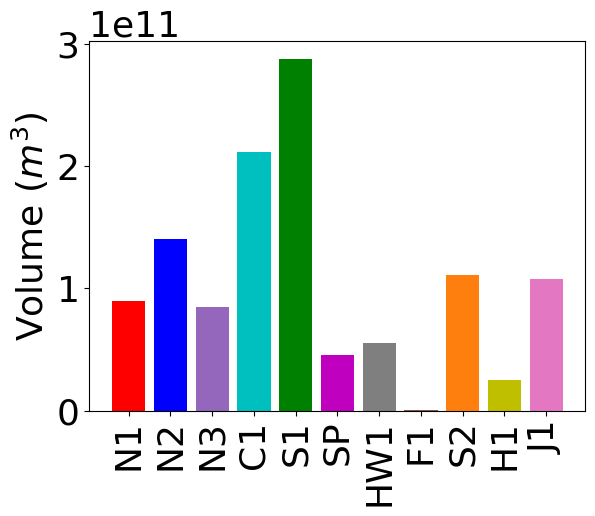

In [37]:
plt.bar(regions, volumes_regions, color = colors_regions)
plt.ylabel('Volume ($m^3$)')
plt.xticks(rotation=90)

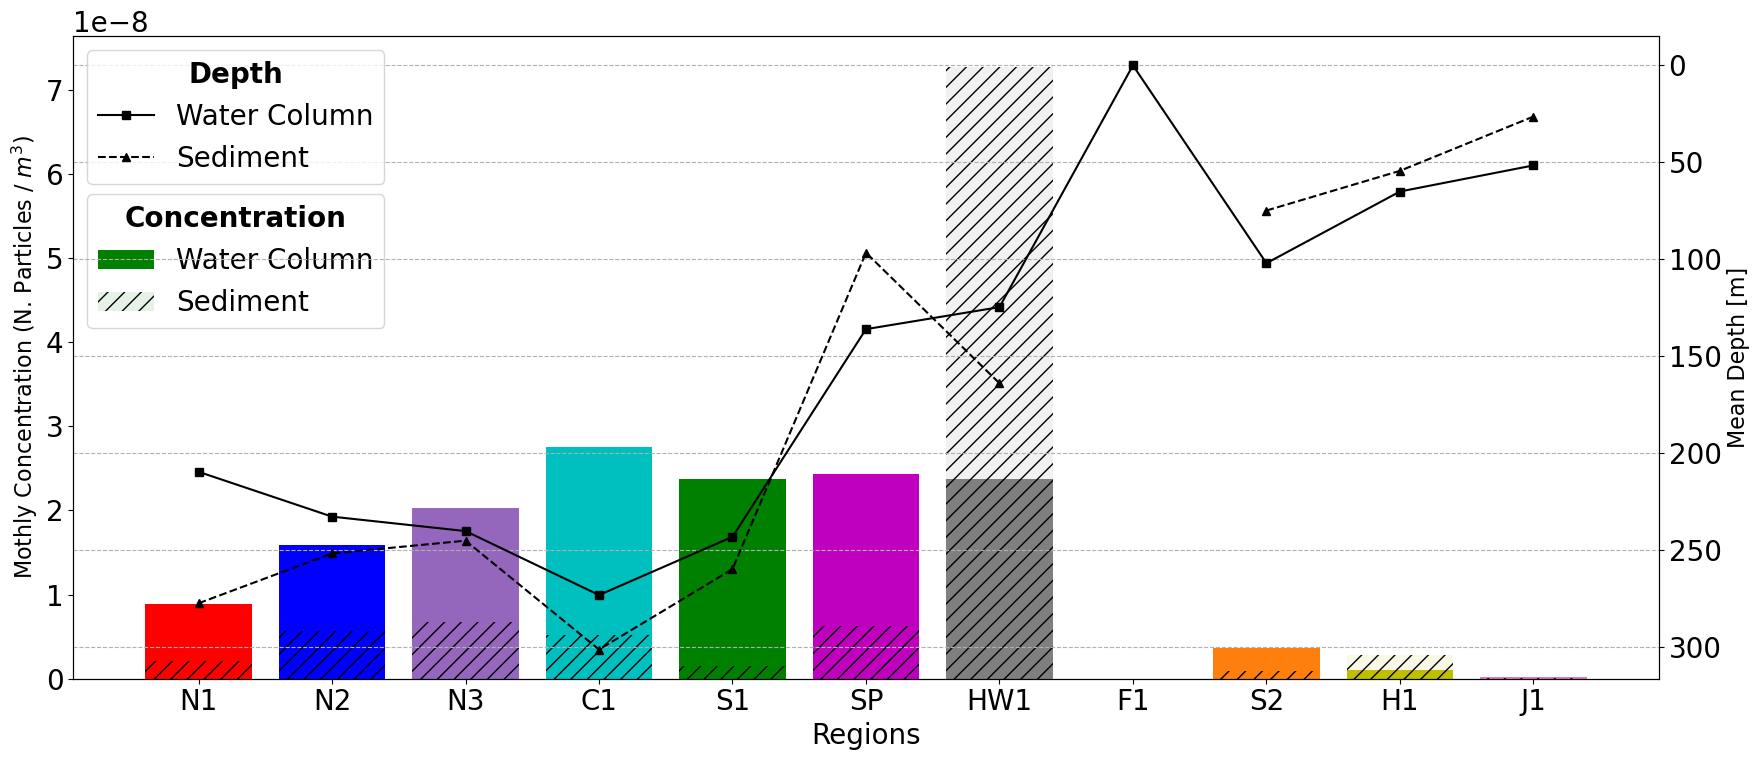

In [38]:
plt.rcParams.update({'font.size': 20})
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions_labels =  ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']
fig, axis = plt.subplots(figsize = (18,8))
#

ax = axis.twinx()
# Water column
# Water column
axis.bar(regions_labels, np.array(bar_regions_water) / np.array(volumes_regions), color = colors_regions) 
axis.bar(regions_labels, np.array(bar_regions_sediment) / np.array(volumes_regions), color = colors_regions, hatch='//', alpha = .1) 
#
axis.bar(regions_labels[4], np.array(bar_regions_water[4]) / np.array(volumes_regions[4]), color = colors_regions[4], label = 'Water Column') 
axis.bar(regions_labels[4], np.array(bar_regions_sediment[4]) / np.array(volumes_regions[4]), color = colors_regions[4], hatch='//', alpha = .1, label = 'Sediment') 
#
axis.set_ylabel(r'Mothly Concentration (N. Particles / $m^3$)', fontsize = 16)

#axis.grid()
legend_concentrations = axis.legend(loc = 'center left', bbox_to_anchor=(0, .65), title = 'Concentration')
legend_concentrations.get_title().set_weight('bold')
axis.set_xlabel('Regions') 
ax.plot(regions_labels,mean_depths_region_water, 's-k', label ='Water Column')   
ax.plot(regions_labels,mean_depths_region_sediment, '^--k', label = 'Sediment') 
ax.invert_yaxis() 
#
legend_depths =  ax.legend(loc = 'upper left', title = 'Depth')
legend_depths.get_title().set_weight('bold')
ax.grid(linestyle = '--')
ax.set_ylabel('Mean Depth [m]', fontsize = 16)
#ax.set_title('End of the month Particles')



plt.tight_layout()

Ratio in concentrations between NSoG and SSoG


In the paper they got 0.038 +- 0.014 day $^{-1}$ ---> (NSoG / SSoG) / (60)

In [39]:
water_N1_con = np.array(bar_regions_colloidal_water[0]) / np.array(volumes_regions[0]) + np.array(bar_regions_marine_water[0]) / np.array(volumes_regions[0])
water_S1_con = np.array(bar_regions_colloidal_water[4]) / np.array(volumes_regions[4]) + np.array(bar_regions_marine_water[4]) / np.array(volumes_regions[4])
N1_S1_ratio = water_N1_con / water_S1_con
print(N1_S1_ratio)

0.3746168667275966


Lets see how particles expand in the sediment

In [40]:
data_sediment = data.status.where(data.status > 10)
lat_sediment = data.lat.where(data.status > 10)
lon_sediment = data.lon.where(data.status > 10)
#
data_water = data.status.where((data.status < 10) & (data.status > 0))
lat_water = data.lat.where((data.status < 10) & (data.status > 0))
lon_water = data.lon.where((data.status < 10) & (data.status > 0))

In [41]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [42]:
# To get the indexes of last month
start_time = pd.Timestamp('2022-01-01 00:00')
time_index = pd.date_range(start=start_time, periods=len(data.obs), freq='6H')

df = pd.DataFrame(index=time_index)
df['datetime'] = df.index  

last_times = df.resample('M').last()['datetime']

indices = df[df['datetime'].isin(last_times)].index.to_list()
#
integer_indices = [df.index.get_loc(ts) for ts in indices]

/tmp/ipykernel_383065/2065981996.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_time, periods=len(data.obs), freq='6H')
/tmp/ipykernel_383065/2065981996.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_times = df.resample('M').last()['datetime']


In [43]:
integer_indices

[123, 235, 359, 479, 603, 723, 847, 971, 1091, 1215, 1335, 1459]

/tmp/ipykernel_383065/1574309694.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
/tmp/ipykernel_383065/1574309694.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


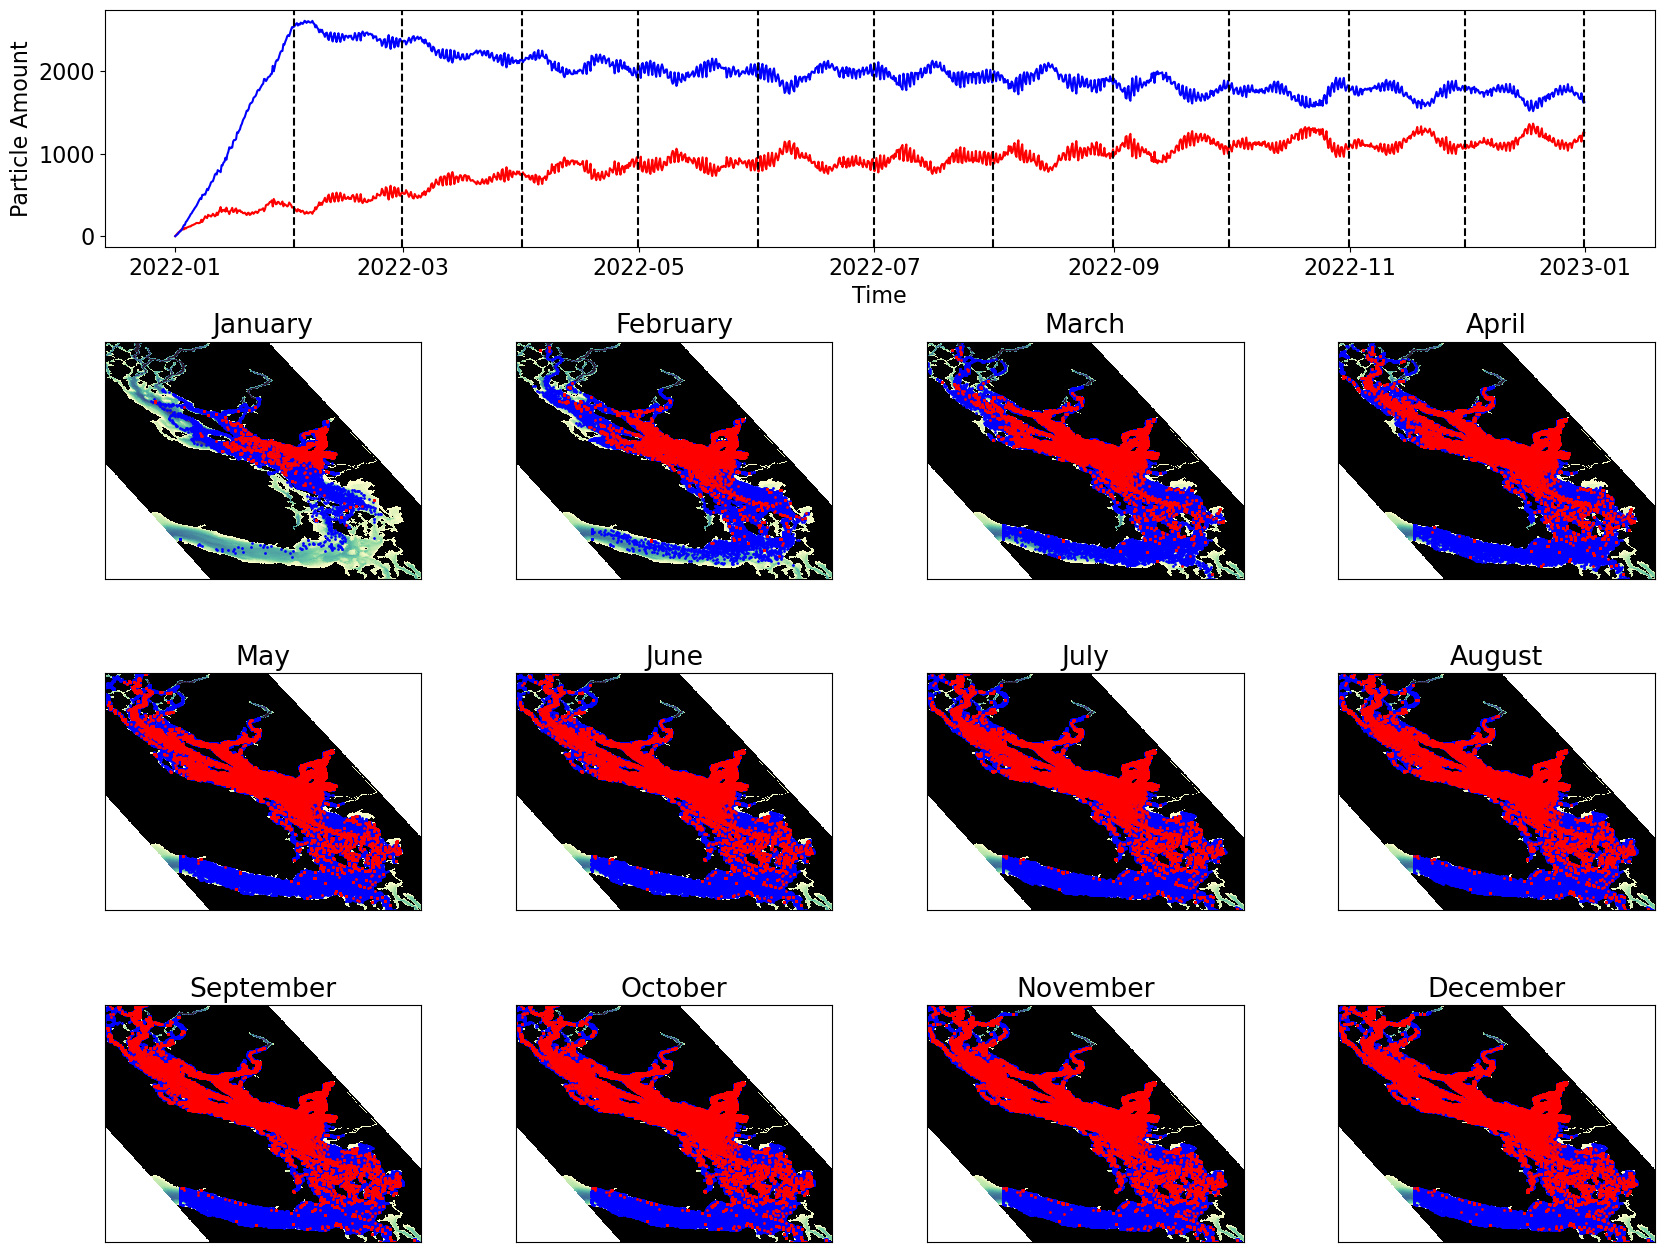

In [44]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.3)

ax_ts = fig.add_subplot(gs[0, :])  
ax_ts.plot(data.time[0, :], np.count_nonzero(data_sediment > 10, axis=0), color='r', label = 'Sedimented')
ax_ts.plot(data.time[0, :], np.count_nonzero((data_water < 10) & ((data_water > 0)) , axis=0), color='b', label = 'Water Column')


for month in range(12):
    idx = integer_indices[month]
    time_val = pd.Timestamp(data.time[0, idx].values)
    ax_ts.axvline(time_val, color='k', linestyle='--')
#
ax_ts.set_xlabel('Time')
ax_ts.set_ylabel('Particle Amount')
months = ['January', 'February', 'March', 'April', 'May', 'June'
          , 'July', 'August', 'September', 'October', 'November', 'December']
for month in range(12):
    row = 1 + (month // 4) 
    col = month % 4
    ax = fig.add_subplot(gs[row, col])
    
    idx = integer_indices[month]

    # Bathymetry
    ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
    ax.set_xlim(-125.4, -122.3)
    ax.set_ylim(48, 50.5)
    
    # Sedimented particles
    ax.scatter(lon_water[:, :idx], lat_water[:, :idx], c='blue', s=1)
    ax.scatter(lon_sediment[:, :idx], lat_sediment[:, :idx], c='red', s=1)
    ax.set_title(f'{months[month]}')
    ax.tick_params(
        which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False,
    )

plt.tight_layout()
plt.show()


# Total spreading pattern and distribution in depth :D

Concentration Map for particles in the water vs in the sediment

In [45]:
data_monthly = data.isel(obs=integer_indices)

In [46]:
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
volume = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')['volume']

Functions for Amount of Particles

In [47]:
def particles_amount_map(lons, lats, mask=mask, num_lon=60, num_lat=70):
    # Define lon and lat lenght 
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)
    #
    # Particle positions into bins
    lon_indices = np.digitize(lons, longitudes) - 1 
    lat_indices = np.digitize(lats, latitudes) - 1
    #
    amount = np.zeros((num_lon, num_lat))
    #
    valid_mask = (lon_indices >= 0) & (lon_indices < num_lon) & (lat_indices >= 0) & (lat_indices < num_lat)
    lon_indices, lat_indices = lon_indices[valid_mask], lat_indices[valid_mask]
    # Count particles 
    indices = np.ravel_multi_index((lon_indices, lat_indices), dims=(num_lon, num_lat))
    counts = np.bincount(indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
    #
    amount[:counts.shape[0], :counts.shape[1]] = counts
    #
    return pd.DataFrame(amount)

In [48]:
def particles_amount_map_by_depth(lons, lats, depths, depth_bins, mask=mask, num_lon=60, num_lat=70):
    """
    Compute particle concentrations in lon-lat bins, separated by depth ranges.
    
    Parameters:
    - lons, lats, depths: arrays of particle positions and depths (same shape)
    - depth_bins: list of tuples/lists, e.g. [(0,15), (16,50), ...]
    - mask: mask dataset with 'nav_lon' and 'nav_lat'
    - num_lon, num_lat: number of bins along longitude and latitude

    Returns:
    - dict of {depth_range_str: DataFrame of particle concentration}
    """
    # Create lon-lat bins
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # Assign lon/lat indices to bins
    lon_indices = np.digitize(lons, longitudes) - 1
    lat_indices = np.digitize(lats, latitudes) - 1

    # Mask valid bin positions
    valid_mask = (
        (lon_indices >= 0) & (lon_indices < num_lon) &
        (lat_indices >= 0) & (lat_indices < num_lat)
    )
    lon_indices = lon_indices[valid_mask]
    lat_indices = lat_indices[valid_mask]
    depths = depths[valid_mask]  # Filter depths accordingly

    # Dictionary to store results
    results = {}

    for depth_min, depth_max in depth_bins:
        # Mask for particles in current depth range
        depth_mask = (depths >= depth_min) & (depths <= depth_max)
        lon_i = lon_indices[depth_mask]
        lat_i = lat_indices[depth_mask]

        # Count particles in 2D bins
        if len(lon_i) > 0:
            flat_indices = np.ravel_multi_index((lon_i, lat_i), dims=(num_lon, num_lat))
            counts = np.bincount(flat_indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
        else:
            counts = np.zeros((num_lon, num_lat))

        # Store as DataFrame
        label = f"{depth_min}-{depth_max} m"
        results[label] = pd.DataFrame(counts)

    return results


Fuctions for Concentration of Particles

In [49]:

def particles_concentration_map(lons, lats, mask=mask, volume=volume, num_lon=60, num_lat=70):
    # Define bin edges
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # Bin particle positions
    lon_indices = np.digitize(lons, longitudes) - 1 
    lat_indices = np.digitize(lats, latitudes) - 1
    valid_mask = (lon_indices >= 0) & (lon_indices < num_lon) & (lat_indices >= 0) & (lat_indices < num_lat)
    lon_indices, lat_indices = lon_indices[valid_mask], lat_indices[valid_mask]

    # Count particles
    indices = np.ravel_multi_index((lon_indices, lat_indices), dims=(num_lon, num_lat))
    amount = np.bincount(indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

    # Sum volume vertically
    volume_2d = volume.sum(dim='z')  # adjust if depth dim is named differently
    mask_lon = mask['nav_lon'].values
    mask_lat = mask['nav_lat'].values
    volume_vals = volume_2d.values

    # Flatten and bin volume grid cells
    flat_vol = volume_vals.ravel()
    flat_lon = mask_lon.ravel()
    flat_lat = mask_lat.ravel()

    lon_bins = np.digitize(flat_lon, longitudes) - 1
    lat_bins = np.digitize(flat_lat, latitudes) - 1
    valid = (lon_bins >= 0) & (lon_bins < num_lon) & (lat_bins >= 0) & (lat_bins < num_lat)
    lon_bins, lat_bins, flat_vol = lon_bins[valid], lat_bins[valid], flat_vol[valid]

    vol_indices = np.ravel_multi_index((lon_bins, lat_bins), dims=(num_lon, num_lat))
    volume_per_bin = np.bincount(vol_indices, weights=flat_vol, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

    # Compute concentration
    with np.errstate(divide='ignore', invalid='ignore'):
        concentration = np.where(volume_per_bin > 0, amount / volume_per_bin, np.nan)

    return pd.DataFrame(concentration)


In [50]:
def particles_concentration_map_by_depth(lons, lats, depths, depth_bins, mask=mask, volume=volume, num_lon=60, num_lat=70):
    """
    Compute particle concentration (particles/m³) in lon-lat bins by depth range.

    Parameters:
    - lons, lats, depths: arrays of particle positions
    - depth_bins: list of (min_depth, max_depth) tuples
    - mask: xarray.Dataset with 'nav_lon', 'nav_lat' [y, x]
    - volume: xarray.DataArray of shape [z, y, x], model volume per grid cell
    - num_lon, num_lat: number of bins along lon and lat

    Returns:
    - dict of DataFrames: {depth_range_str: DataFrame of concentrations}
    """

    # 1. Define lon/lat bin edges
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # 2. Digitize particle positions into lon-lat bins
    lon_idx = np.digitize(lons, longitudes) - 1
    lat_idx = np.digitize(lats, latitudes) - 1

    valid = (lon_idx >= 0) & (lon_idx < num_lon) & (lat_idx >= 0) & (lat_idx < num_lat)
    lon_idx = lon_idx[valid]
    lat_idx = lat_idx[valid]
    depths = depths[valid]

    # 3. Flatten model grid to bin volume
    nav_lon = mask['nav_lon'].values.ravel()
    nav_lat = mask['nav_lat'].values.ravel()
    ny, nx = mask['nav_lon'].shape

    grid_lon_idx = np.digitize(nav_lon, longitudes) - 1
    grid_lat_idx = np.digitize(nav_lat, latitudes) - 1

    grid_valid = (
        (grid_lon_idx >= 0) & (grid_lon_idx < num_lon) &
        (grid_lat_idx >= 0) & (grid_lat_idx < num_lat)
    )
    grid_lon_idx = grid_lon_idx[grid_valid]
    grid_lat_idx = grid_lat_idx[grid_valid]

    flat_index_map = np.full(nav_lon.shape, -1, dtype=int)
    flat_index_map[grid_valid] = np.ravel_multi_index(
        (grid_lon_idx, grid_lat_idx), dims=(num_lon, num_lat)
    )

    # 4. Loop over depth ranges
    results = {}

    for depth_min, depth_max in depth_bins:
        label = f"{depth_min}-{depth_max} m"

        # (a) Count particles in this depth range
        depth_mask = (depths >= depth_min) & (depths <= depth_max)
        lon_i = lon_idx[depth_mask]
        lat_i = lat_idx[depth_mask]

        if len(lon_i) > 0:
            part_flat = np.ravel_multi_index((lon_i, lat_i), dims=(num_lon, num_lat))
            counts = np.bincount(part_flat, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
        else:
            counts = np.zeros((num_lon, num_lat))

        # (b) Get volume from model grid for this depth range
        # Assuming model z levels are from shallow (0) to deep
        z_levels = volume['z'].values
        if z_levels[0] > z_levels[-1]:
            z_mask = (z_levels <= depth_max) & (z_levels >= depth_min)
        else:
            z_mask = (z_levels >= depth_min) & (z_levels <= depth_max)

        vol_slice = volume.isel(z=z_mask).sum(dim='z').values  # shape: [y, x]
        vol_flat = vol_slice.ravel()

        # (c) Bin volume using the same lon-lat binning
        valid_vol = flat_index_map >= 0
        flat_indices = flat_index_map[valid_vol]
        vol_vals = vol_flat[valid_vol]

        volume_per_bin = np.bincount(flat_indices, weights=vol_vals, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

        # (d) Compute concentration
        with np.errstate(divide='ignore', invalid='ignore'):
            concentration = np.where(volume_per_bin > 0, counts / volume_per_bin, np.nan)

        results[label] = pd.DataFrame(concentration)

    return results


In [51]:
lon_sed = data.where(data['status'] > 10)['lon'].values.flatten()        
lat_sed = data.where(data['status'] > 10)['lat'].values.flatten()
depth_sed = data.where(data['status'] > 10)['z'].values.flatten()
#########
lon_wat = data.where((data['status'] > 0) & (data['status'] < 4))['lon'].values.flatten()
lat_wat = data.where((data['status'] > 0) & (data['status'] < 4))['lat'].values.flatten()
depth_wat = data.where((data['status'] > 0) & (data['status'] < 4))['z'].values.flatten()

In [52]:
depths_bins = [(0,15), (20,80), (100,250), (250,400)]

# Particles Amount 

In [53]:
amount_sediment = particles_amount_map_by_depth(lons=lon_sed, lats=lat_sed, depths = depth_sed, depth_bins = depths_bins)
amount_water = particles_amount_map_by_depth(lons=lon_wat, lats=lat_wat, depths = depth_wat, depth_bins = depths_bins)
total_amount = particles_amount_map_by_depth(lons=data['lon'].values.flatten(), lats=data['lat'].values.flatten(), depths = data['z'].values.flatten(), depth_bins = depths_bins)
#
total_amount_sediment = particles_amount_map(lons=lon_sed, lats=lat_sed)
total_amount_water = particles_amount_map(lons=lon_wat, lats=lat_wat)
total_amount_depth = particles_amount_map(lons=data['lon'], lats=data['lat'])

# Particles Concentration

In [54]:
concentration_sediment = particles_concentration_map_by_depth(lons=lon_sed, lats=lat_sed, depths = depth_sed, depth_bins = depths_bins)
concentration_water = particles_concentration_map_by_depth(lons=lon_wat, lats=lat_wat, depths = depth_wat, depth_bins = depths_bins)
total_concentration = particles_concentration_map_by_depth(lons=data['lon'].values.flatten(), lats=data['lat'].values.flatten(), depths = data['z'].values.flatten(), depth_bins = depths_bins)
#
total_concentration_sediment = particles_concentration_map(lons=lon_sed, lats=lat_sed)
total_concentration_water = particles_concentration_map(lons=lon_wat, lats=lat_wat)
total_concentration_depth = particles_concentration_map(lons=data['lon'], lats=data['lat'])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 357404

In [ ]:
TT = 1e-6
norm_concentration = LogNorm(vmin=total_amount_depth.min().min() + 1e-8, vmax=total_amount_depth.max().max())

In [ ]:
plt.pcolormesh(longitudes, latitudes, concentration_water[labels[1]].T, cmap='Blues')
plt.colorbar()

In [ ]:
plt.pcolormesh(longitudes, latitudes, concentration_water[labels[1]].T, cmap='Blues', norm=norm_concentration)
plt.contour(longitudes, latitudes, concentration_water[labels[1]].T,levels=[TT],colors='yellow',linewidths=2)
plt.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)

In [ ]:
labels = ['0-15 m', '20-80 m', '100-250 m', '250-400 m']

In [ ]:
clat = [49.195045]
clon = [-123.301956]
num_lon = 60
num_lat = 70
longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon)
latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat)

In [ ]:
TT = 10000
norm = LogNorm(vmin=total_amount_depth.min().min() + 1e-1, vmax=total_amount_depth.max().max())

In [ ]:

colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
yellow_cmap = ListedColormap(['yellow'])

#
fig, ax = plt.subplots(2,2,figsize=(15,15))
# 0-15 m
c = ax[0,0].pcolormesh(longitudes, latitudes, amount_water[labels[0]].T, cmap='Blues', norm=norm)
ax[0,0].contour(longitudes, latitudes, amount_water[labels[0]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,0].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,0], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[0,0].legend()
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title(labels[0])
#
# 20-80 m
c = ax[0,1].pcolormesh(longitudes, latitudes, amount_water[labels[1]].T, cmap='Blues', norm=norm)
ax[0,1].contour(longitudes, latitudes, amount_water[labels[1]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,1].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,1], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[0,1].legend()
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title(labels[1])
#
# 100-250 m
c = ax[1,0].pcolormesh(longitudes, latitudes, amount_water[labels[2]].T, cmap='Blues', norm=norm)
ax[1,0].contour(longitudes, latitudes, amount_water[labels[2]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,0].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,0], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[1,0].legend()
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title(labels[2])
#
# 250-400 m
c = ax[1,1].pcolormesh(longitudes, latitudes, amount_water[labels[3]].T, cmap='Blues', norm=norm)
ax[1,1].contour(longitudes, latitudes, amount_water[labels[3]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,1].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,1], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,1].legend()
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title(labels[3])
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
# 0-15 m
c = ax[0,0].pcolormesh(longitudes, latitudes, amount_sediment[labels[0]].T, cmap='Reds', norm=norm)
ax[0,0].contour(longitudes, latitudes, amount_sediment[labels[0]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,0].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,0], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[0,0].legend()
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title(labels[0])
#
# 20-80 m
c = ax[0,1].pcolormesh(longitudes, latitudes, amount_sediment[labels[1]].T, cmap='Reds', norm=norm)
ax[0,1].contour(longitudes, latitudes, amount_sediment[labels[1]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,1].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,1], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[0,1].legend()
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title(labels[1])
#
# 100-250 m
c = ax[1,0].pcolormesh(longitudes, latitudes, amount_sediment[labels[2]].T, cmap='Reds', norm=norm)
ax[1,0].contour(longitudes, latitudes, amount_sediment[labels[2]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,0].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,0], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,0].legend()
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title(labels[2])
#
# 250-400 m
c = ax[1,1].pcolormesh(longitudes, latitudes, amount_sediment[labels[3]].T, cmap='Reds', norm=norm)
ax[1,1].contour(longitudes, latitudes, amount_sediment[labels[3]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,1].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,1], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,1].legend()
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title(labels[3])
plt.tight_layout()

Total sediment map

In [ ]:
TT_sediment_1 = 10000


In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))

# Left plot: pcolormesh
c_t = ax.pcolormesh(longitudes, latitudes, total_amount_sediment.T, cmap='Reds', norm=norm)
ax.contour(longitudes, latitudes, total_amount_sediment.T,levels=[TT_sediment_1],colors='yellow',linewidths=2)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax.scatter(clon, clat, c='c', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax, label="Total Amount on the Sediment", orientation='vertical', pad=0.1)
cb_t.ax.hlines(TT_sediment_1, *cb_t.ax.get_xlim(), color='yellow', linewidth=2)

# Ax1 config
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))

# Left plot: pcolormesh
c_t = ax.pcolormesh(longitudes, latitudes, total_amount_water.T, cmap='Blues', norm=norm)
ax.contour(longitudes, latitudes, total_amount_water.T,levels=[TT_sediment_1],colors='yellow',linewidths=2)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax.scatter(clon, clat, c='m', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax, label="Total Amount in the Water Column", orientation='vertical', pad=0.1)
cb_t.ax.hlines(TT_sediment_1, *cb_t.ax.get_xlim(), color='yellow', linewidth=2)

# Ax1 config
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.legend()

Total map and plots per depth ranges :D

In [ ]:
from matplotlib.lines import Line2D

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1, 2]})

# Left plot: pcolormesh
c_t = ax3.pcolormesh(longitudes, latitudes, total_amount_depth.T, cmap='Purples', norm=norm)
ax3.contour(longitudes, latitudes, total_amount_depth.T ,levels=[10000],colors='yellow',linewidths=1)
ax3.contour(longitudes, latitudes, total_amount_depth.T ,levels=[50000],colors='orange',linewidths=1)


ax3.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax3.scatter(clon, clat, c='c', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax3, label="Total Amount", orientation='vertical', pad=0.1)
cb_t.ax.hlines(10000, *cb_t.ax.get_xlim(), color='yellow', linewidth=3)
cb_t.ax.hlines(50000, *cb_t.ax.get_xlim(), color='orange', linewidth=3)



# Ax1 config
#ax3.set_ylabel('Latitude')
ax3.set_xlabel('Longitude')
ax3.legend()

# Right plot: line plot
ax2.plot(amount_water[labels[0]].mean(), latitudes, '-k',label=labels[0])
ax2.plot(amount_water[labels[1]].mean(),latitudes, '-b',label=labels[1])
ax2.plot(amount_water[labels[2]].mean(),latitudes, '-r',label=labels[2])
ax2.plot(amount_water[labels[3]].mean(),latitudes, '-g', label=labels[3])
ax2.invert_xaxis()
ax2.grid(linestyle='--')
ax2.set_xlabel('Mean amount')
ax2.set_xlabel('Mean amount')
ax2.set_title("Latitudinal Profiles")
#
legend_elements_x2 = [
    Line2D([0], [0], color='k', lw=0, label='Water column'),  # "title" for first section
    Line2D([0], [0], color='k', linestyle='-', label=labels[0]),
    Line2D([0], [0], color='b', linestyle='-', label=labels[1]),
    Line2D([0], [0], color='r', linestyle='-', label=labels[2]),
    Line2D([0], [0], color='g', linestyle='-', label=labels[3])
]
ax2.legend(handles=legend_elements_x2, frameon=True)

#
ax1.plot(amount_sediment[labels[0]].mean(), latitudes, '--k',label=labels[0])
ax1.plot(amount_sediment[labels[1]].mean(),latitudes, '--b',label=labels[1])
ax1.plot(amount_sediment[labels[2]].mean(),latitudes, '--r',label=labels[2])
ax1.plot(amount_sediment[labels[3]].mean(),latitudes, '--g', label=labels[3])
#
ax1.invert_xaxis()
ax1.grid(linestyle='--')
ax1.set_xlabel('Mean amount')
ax1.set_ylabel('Latitude')
ax1.set_title("Latitudinal Profiles")
#
legend_elements_x1 = [Line2D([0], [0], color='k', lw=0, label='Sediment'),  # "title" for second section
    Line2D([0], [0], color='k', linestyle='--', label=labels[0]),
    Line2D([0], [0], color='b', linestyle='--', label=labels[1]),
    Line2D([0], [0], color='r', linestyle='--', label=labels[2]),
    Line2D([0], [0], color='g', linestyle='--', label=labels[3])
]

# Add to ax2
ax1.legend(handles=legend_elements_x1, frameon=True)
#
ax2.set_xlim([3500, 0])
ax1.set_xlim([3500, 0])
#plt.tight_layout()
plt.show()
